# Case 1 - Customer segmentation (clustering)
# HOTEL CUSTOMER SEGMENTATION
#### Group F 

## Initial setup and modules/packages loading

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sqlite3
from math import ceil
from sklearn import datasets
import math

from itertools import product


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from datetime import datetime
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

sns.set()


from matplotlib import ticker
import collections
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance


from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

#Calinski Harabasz Index
from sklearn.metrics import calinski_harabasz_score
#David Bouldin Index
from sklearn.metrics import davies_bouldin_score

#t-SNE
from sklearn.manifold import TSNE

#Cluster Stability Test
from sklearn.metrics import adjusted_rand_score

In [2]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

## Metadata
- *ID* - Customer ID
- *Nationality* - Nationality of the customer in ISO 3166-1 (Alpha 3) format
- *Age* - The age of the customer
- *DaysSinceCreation* - Number of elapsed days since the customer was created
- *NameHash* - Hash of the customer's name
- *DocIDHash* - Hash of the customer’s personal document identification number (usually a passport or ID card)
- *AverageLeadTime* - Average number of days before arrival date the customer makes bookings
- *LodgingRevenue* - Total amount of lodging revenue paid by the customer so far
- *OtherRevenue* - Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far
- *BookingsCanceled* - Number of bookings the customer made but subsequently canceled
- *BookingsNoShowed* -  Number of bookings the customer made but subsequently made a "no-show"
- *BookingsCheckedin* - Number of bookings the customer made, which actually ended up staying
- *PersonNights* - Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-ofstay) of the booking
- *RoomNights* - Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-ofstay) of the booking
- *DistributionChannel* - Distribution channel normally used by the customer to make bookings at the hotel
- *MarketSegment* - Current market segment of the customer
- *SRHighFloor* - Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes)
- *SRLowFloor* - Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes)
- *SRAccessibleRoom* -  Indication if the customer usually asks for an accessible room (0: No, 1: Yes)
- *SRMediumFloor* - Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes)
- *SRBathtub* - Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)
- *SRShower* - Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)
- *SRCrib* - Indication if the customer usually asks for a crib (0: No, 1: Yes)
- *SRKingSizeBed* - Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes)
- *SRTwinBed* - Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes)
- *SRNearElevator* - Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)
- *SRAccessibleRoom* -  Indication if the customer usually asks for an accessible room (0: No, 1: Yes)
- *SRAwayFromElevator* - Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)
- *SRNoAlcoholInMiniBar* - Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes)
- *SRQuietRoom* - Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)

## Load data


In [3]:
df = pd.read_csv('/Users/ricardokayseller/Desktop/DATA SCIENCE 2ND SEMESTER/Business cases data science/1º caso/Case1_HotelCustomerSegmentation.csv', sep= ';')

# Data Exploration


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    111733 non-null  int64  
 1   Nationality           111733 non-null  object 
 2   Age                   107561 non-null  float64
 3   DaysSinceCreation     111733 non-null  int64  
 4   NameHash              111733 non-null  object 
 5   DocIDHash             110732 non-null  object 
 6   AverageLeadTime       111733 non-null  int64  
 7   LodgingRevenue        111733 non-null  float64
 8   OtherRevenue          111733 non-null  float64
 9   BookingsCanceled      111733 non-null  int64  
 10  BookingsNoShowed      111733 non-null  int64  
 11  BookingsCheckedIn     111733 non-null  int64  
 12  PersonsNights         111733 non-null  int64  
 13  RoomNights            111733 non-null  int64  
 14  DistributionChannel   111733 non-null  object 
 15  

In [5]:
df.head(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.set_index('ID', inplace=True)

In [7]:
# Summary statistics for all variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nationality,111733,199,FRA,16516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107561.0,NaN,NaN,NaN,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.0
DaysSinceCreation,111733.0,NaN,NaN,NaN,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.0
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,111733.0,NaN,NaN,NaN,60.833147,85.11532,-1.0,0.0,21.0,95.0,588.0
LodgingRevenue,111733.0,NaN,NaN,NaN,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.0
OtherRevenue,111733.0,NaN,NaN,NaN,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,NaN,NaN,NaN,0.002282,0.080631,0.0,0.0,0.0,0.0,15.0
BookingsNoShowed,111733.0,NaN,NaN,NaN,0.0006,0.028217,0.0,0.0,0.0,0.0,3.0


In [8]:
df.shape

(111733, 28)

In [9]:
df.dtypes

Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

In [10]:
#profile= ProfileReport(df)
#profile

In [11]:
# Check duplicate values
df.duplicated().sum()

111

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
# Check missing values
df.isna().sum()

Nationality                0
Age                     4092
DaysSinceCreation          0
NameHash                   0
DocIDHash                932
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

**Summary statistics shows:**
- Age and DocIDHash present missing values. Other columns present no missing values (in the sense of having no empty columns). 
- Age shows some missing values and negative ones, which we should consider as outliers. 

In [15]:
df = df[(df['Age'] >= 16) | (pd.isna(df['Age']))]

- Removes rows where the 'Age' is less than 18 - not important in terms of marketing, since we cannnot target them - and does not remove NaN's.

#### Checking some variables unique values

In [16]:
df['DistributionChannel'].unique()

array(['Corporate', 'Travel Agent/Operator', 'Direct', 'GDS Systems'],
      dtype=object)

In [17]:
df['MarketSegment'].unique()

array(['Corporate', 'Travel Agent/Operator', 'Other', 'Direct',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [18]:
df['OtherRevenue'].unique()

array([ 82.3 ,  53.  ,   0.  , ..., 123.7 , 124.65, 216.1 ])

In [19]:
df['LodgingRevenue'].unique()

array([292.  , 280.  ,   0.  , ..., 665.8 , 453.25, 173.55])

In [20]:
df['Age'].unique()

array([ 52.,  nan,  32.,  61.,  55.,  50.,  33.,  43.,  26.,  28.,  59.,
        57.,  58.,  69.,  73.,  72.,  25.,  27.,  51.,  53.,  37.,  65.,
        66.,  48.,  68.,  40.,  42.,  44.,  64.,  31.,  29.,  19.,  54.,
        49.,  18.,  39.,  41.,  60.,  62.,  70.,  56.,  71.,  35.,  67.,
        83.,  36.,  63.,  46.,  38.,  30.,  45.,  34.,  47.,  21.,  75.,
        74.,  23.,  20.,  79.,  78.,  22.,  77.,  76.,  16.,  84.,  24.,
        81.,  80.,  17.,  82., 115.,  85.,  86.,  88.,  90.,  92.,  89.,
        87., 111.,  93., 114.,  91., 123.,  97., 110.,  95.])

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
# Metric and Non-metric feature identification
metric_features = [
    "Age", "DaysSinceCreation", "AverageLeadTime", "LodgingRevenue", "OtherRevenue",
    "BookingsCanceled", "BookingsNoShowed", "BookingsCheckedIn", "PersonsNights", "RoomNights"
]

non_metric_features = [
    "Nationality", "DistributionChannel", "MarketSegment",
    "SRHighFloor", "SRLowFloor", "SRAccessibleRoom", "SRMediumFloor", "SRBathtub",
    "SRShower", "SRCrib", "SRKingSizeBed", "SRTwinBed", "SRNearElevator", "SRAwayFromElevator",
    "SRNoAlcoholInMiniBar", "SRQuietRoom"
]

#### Dealing with the Hash problem 

In [23]:
# get the number of times the same combination 'Nationality', 'Age', 'NameHash' and 'DocIDHash' show up
hash_ = pd.DataFrame(df.groupby(['Age', 'NameHash','DocIDHash'])['Nationality'].count())
hash_

Nationality
Age   NameHash                                           DocIDHash                                                      
16.0  0x0148765946C2DF63F93CE5E95D465EFBF2BF6B1CFC0AF... 0xE2913075AAC960164A98BEF9DA938E71B09619209D715...            1
      0x0275A1C3478AB144D39907FB7BC3C0F8C10904F927CDE... 0xE9FBD67977AC42B7B4997D28412DF4DB2A13161077C1C...            1
      0x02F7FF376274278ACEDF755D82DEAC088E8CC1B5279CD... 0xD7258F36BA60DE118BD7B50DE623D78A405256A9B8450...            1
      0x03456AD649C7E07EBBF3F8B7122A959025D187B922BD0... 0x51C8A7007E87CE47CD4B70DB62604C77A2BDE0385EEFA...            1
      0x03A758F5929BCCB30D628A6DCFD00006854A5336E0C05... 0x3A51EFB75A6EF483CC0550CDBC6758CACA6664E7A2531...            1
...                                                                                                                  ...
114.0 0xA5F68A67139168CF952B006354B65964A2C38D79A4F5F... 0xEDE630FB631373804FBF8325A0B48E67E8A8C575E7EF0...            1
      0xAA6D4B36828028BE3F09FE5751DE971B7BE4B2BC038ED... 0xD37FD9597B00ED4BC4EA2CB864521C48882E30DCA7AE4...            1
115.0 0x02D4575C7FE55631DBE81E8181066109AEFDCA58973F3... 0xEC8ADED0F788BA1D46CEFF00FE180192B783BDA6F184F...            1
      0xD906278493442999E6245450B8C306ABB9CA75F390326... 0xB207B868D8878FBBB1D449631EFDB684FAFC49AC57AF1...            1
123.0 0xE651AC190A6B9F1AEC6357AE26B7E871A54A7B5B3398A... 0x21711474FF0CA1361823EDB5535B72CF6159EE1AEB43A...            1

[98997 rows x 1 columns]

In [24]:
# get the combination that show up more than once (duplicates)
hash_ = hash_[hash_['Nationality']>1]
hash_

Nationality
Age  NameHash                                           DocIDHash                                                      
16.0 0x462DB95D080D20560E42D76CE6B1B75B171BEB4BE7E02... 0x63401B3E87EE30CCCBFC875BE8E04BE638AF754F5428A...            2
     0x8C652EE31DF9E7E45A199D765DD23FE22A5307CBC4B17... 0xA015E9CEFE1E80347AD40896D41561BDF8C0622D2CEE7...            2
     0xB86247B8B4EEF3F38F6B02B19B19230809EB19E9DB2AE... 0xFFA0DA6C18D771EED51F0E62919ED8AC18D14ACC631ED...            2
     0xC16C7CEC93BFFA752B1223839A50233500D3532F280DE... 0x769410CAD9AC14FDC90740649DBBDC4FAA8D82117916A...            2
     0xE675F2201575D42082E477A99B20A839D0E087819AA2B... 0xF99D6461EB37A6FDF1A5A60798E49B566033EB251AF15...            2
...                                                                                                                 ...
84.0 0xED5A50D37397CCA3546F0AD8B311B7BAEFB0CFB649181... 0xF252E348F797FCD3E359E9355948755F048AE16E481E3...            2
85.0 0x11D134F76AD40F90437D09A47C4B2F934AFBB29996977... 0x5F08D93CA5FF1346B428A92A869A5250B9D586677960A...            2
     0xA1BBD6F214041ACEFD8C178E1A42F833FB5B7CAC8D731... 0xAD403F2A05B1049FCB9C1DBE7EA922C4B7D52F64C4FA1...            2
87.0 0x0FA46144089189ADF11CEAE387F4E64C3DBBE98496F3B... 0xD080757C5977413DBEA984112BA137C7E5EC9CF990AF3...            2
89.0 0x1C5B3F1594FDC683743819266D43F6C471103BBA34B13... 0xF6C26FF65D49EA9C9FFE85F61CC8A9BC5A17FBC81A0D5...            2

[2148 rows x 1 columns]

In [25]:
# the Combination that shows up more  
hash_[hash_['Nationality']==hash_['Nationality'].max()]

,,,Nationality
Age,NameHash,DocIDHash,
51.0,0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A960AD7D9A7FB4EC61D02F,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B,20


In [26]:
# total number of appearances with count greater than 1
hash_['Nationality'].sum()

4937

In [27]:
# drop rows by merge
# first rename column so we don't have duplicate columns
hash_.rename(columns={'Nationality': 'NationalityCounts'}, inplace=True)

# second, perform merge
df_merge = pd.merge(df, hash_, on=['Age', 'NameHash', 'DocIDHash'], how='left', indicator=True)

# drop columns with suffix (the ones from hash_)
df = df_merge[df_merge['_merge'] == 'left_only'].drop('_merge', axis=1)
df

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,NationalityCounts
0,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105873,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
105874,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
105875,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
105876,DEU,48.0,36,0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...,0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...,66,708.00,185.0,0,0,1,8,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [28]:
# check counts 
df['DocIDHash'].value_counts()

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    3006
0x1B16B1DF538BA12DC3F97EDBB85CAA7050D46C148134290FEBA80F8236C83DB9      10
0xA48228BEB6FDA0E41844789716EC6C3F5B5328B9FA6ED0A41A36AC1E7BE62866       7
0x7CC568500E7D63F938C532073C8FB438F67E1F1F6AF9C8409D1BE3F9ABA4CE5D       6
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B       5
                                                                      ... 
0xFE9CDC7351AF73225DBA90EE7CD660A4FEAD10EA8687EFD34D10DDB07E73EA3F       1
0xCC1037854F6BA8C6A5D95212464D74C58A1A9EE3C27C49730E9F54D8CCF53FEE       1
0x8D8BCDF7EE58F66554D7A56853247B936CCA9D0374F1883EAB10A7502384B890       1
0x8C819535C82E378B73BF78E2D15A512B81439F5A76AC1D500FC7730B07355DF9       1
0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7CE438BCBA07BB1012304       1
Name: count, Length: 96009, dtype: int64

In [29]:
df[['Nationality','Age', 'NameHash', 'DocIDHash']].drop_duplicates(keep='first')

,Nationality,Age,NameHash,DocIDHash
0,PRT,52.0,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...
1,PRT,NaN,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...
2,DEU,32.0,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...
3,FRA,61.0,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...
4,FRA,52.0,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...
...,...,...,...,...
105873,DEU,31.0,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...
105874,BRA,43.0,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...
105875,BRA,37.0,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...
105876,DEU,48.0,0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...,0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100941 entries, 0 to 105877
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           100941 non-null  object 
 1   Age                   96849 non-null   float64
 2   DaysSinceCreation     100941 non-null  int64  
 3   NameHash              100941 non-null  object 
 4   DocIDHash             100009 non-null  object 
 5   AverageLeadTime       100941 non-null  int64  
 6   LodgingRevenue        100941 non-null  float64
 7   OtherRevenue          100941 non-null  float64
 8   BookingsCanceled      100941 non-null  int64  
 9   BookingsNoShowed      100941 non-null  int64  
 10  BookingsCheckedIn     100941 non-null  int64  
 11  PersonsNights         100941 non-null  int64  
 12  RoomNights            100941 non-null  int64  
 13  DistributionChannel   100941 non-null  object 
 14  MarketSegment         100941 non-null  object 
 15  SRHig

In [31]:
df.drop(['NationalityCounts'], axis=1, inplace=True)

## Data preparation

#### Handling Missing Values

In [32]:
df.isna().sum()

Nationality                0
Age                     4092
DaysSinceCreation          0
NameHash                   0
DocIDHash                932
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [33]:
# Median of Age
age_median = df['Age'].median()

# Fill NaNs of Age with median
df['Age'] = df['Age'].fillna(age_median)

In [34]:
# Mode of DocIDHash
DocIDHash_mode = df['DocIDHash'].mode()[0]

# Fill NaNs of DocIDHash with mode
df['DocIDHash'] = df['DocIDHash'].fillna(DocIDHash_mode)

In [35]:
df.isna().sum()

Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

#### Remove highly imbalanced variables

In [36]:
columns = ["SRLowFloor","SRAccessibleRoom","SRMediumFloor","SRBathtub","SRShower","SRNearElevator","SRAwayFromElevator","SRNoAlcoholInMiniBar","SRCrib", "SRKingSizeBed", "SRTwinBed", "SRQuietRoom","SRHighFloor"]

# Percentage of 0s and 1s
for column in columns:
    counts = df[column].value_counts(normalize=True) * 100
    print(f"Percentagens para {column}:")
    print(counts.to_string(), "\n")

Percentagens para SRLowFloor:
SRLowFloor
0    99.872203
1     0.127797 

Percentagens para SRAccessibleRoom:
SRAccessibleRoom
0    99.977214
1     0.022786 

Percentagens para SRMediumFloor:
SRMediumFloor
0    99.933625
1     0.066375 

Percentagens para SRBathtub:
SRBathtub
0    99.686946
1     0.313054 

Percentagens para SRShower:
SRShower
0    99.836538
1     0.163462 

Percentagens para SRNearElevator:
SRNearElevator
0    99.968298
1     0.031702 

Percentagens para SRAwayFromElevator:
SRAwayFromElevator
0    99.648309
1     0.351691 

Percentagens para SRNoAlcoholInMiniBar:
SRNoAlcoholInMiniBar
0    99.982168
1     0.017832 

Percentagens para SRCrib:
SRCrib
0    98.795336
1     1.204664 

Percentagens para SRKingSizeBed:
SRKingSizeBed
0    63.869983
1    36.130017 

Percentagens para SRTwinBed:
SRTwinBed
0    83.854925
1    16.145075 

Percentagens para SRQuietRoom:
SRQuietRoom
0    91.290952
1     8.709048 

Percentagens para SRHighFloor:
SRHighFloor
0    95.737114
1     4.2628

Analysis on imbalanced data:
- The variables: SRNoAlcoholInMiniBar, SRAwayFromElevator, SRNearElevator, SRShower, SRBathtub, SRMediumFloor, SRAccessibleRoom and SRLowFloor have around 99% of 0's, are very imbalanced variables, i.e., don't give us any relevant insights. Consequently, these will be dropped.

In [37]:
df.drop(columns=['SRLowFloor'], inplace = True)
df.drop(columns=['SRMediumFloor'], inplace = True)
df.drop(columns=['SRBathtub'], inplace = True)
df.drop(columns=['SRShower'], inplace = True)
df.drop(columns=['SRNearElevator'], inplace = True)
df.drop(columns=['SRAwayFromElevator'], inplace = True)
df.drop(columns=['SRNoAlcoholInMiniBar'], inplace = True)
df.drop(columns=['SRAccessibleRoom'], inplace = True)

#Update non-metric features 
non_metric_features.remove('SRLowFloor')
non_metric_features.remove('SRMediumFloor')
non_metric_features.remove('SRBathtub')
non_metric_features.remove('SRShower')
non_metric_features.remove('SRNearElevator')
non_metric_features.remove('SRAwayFromElevator')
non_metric_features.remove('SRNoAlcoholInMiniBar')
non_metric_features.remove('SRAccessibleRoom')

#### Handling Outliers

The maximum value of the upper whisker is: 10.0
The minimum value of the lower whisker is: -6.0
The number of outliers above this value is: 307
The number of outliers below this value is: 0


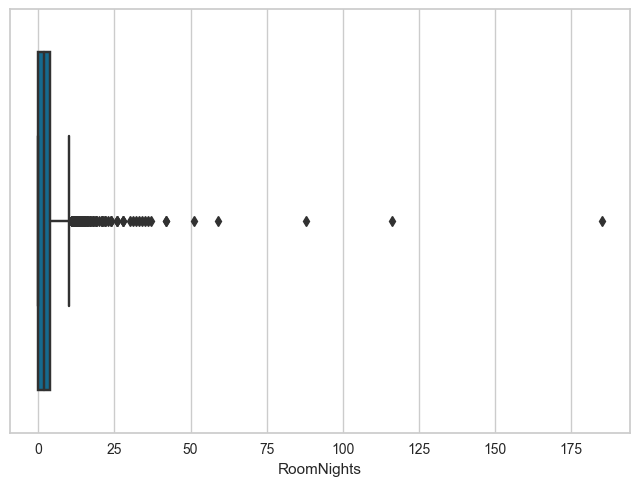

In [38]:
# Column of interest
column_of_interest = 'RoomNights'

# Creating boxplot
sns.boxplot(x=df[column_of_interest])

# Calculate maximum value of upper whisker
upper_whisker_max_value = df[column_of_interest].quantile(0.75) + 1.5 * (df[column_of_interest].quantile(0.75) - df[column_of_interest].quantile(0.25))

# Calculate minimum value of lower whisker
lower_whisker_min_value = df[column_of_interest].quantile(0.25) - 1.5 * (df[column_of_interest].quantile(0.75) - df[column_of_interest].quantile(0.25))

# Finding number of outliers above and below these values
outliers_above = df[df[column_of_interest] > upper_whisker_max_value]
outliers_below = df[df[column_of_interest] < lower_whisker_min_value]
num_outliers_above = outliers_above.shape[0]
num_outliers_below = outliers_below.shape[0]

print(f"The maximum value of the upper whisker is: {upper_whisker_max_value}")
print(f"The minimum value of the lower whisker is: {lower_whisker_min_value}")
print(f"The number of outliers above this value is: {num_outliers_above}")
print(f"The number of outliers below this value is: {num_outliers_below}")

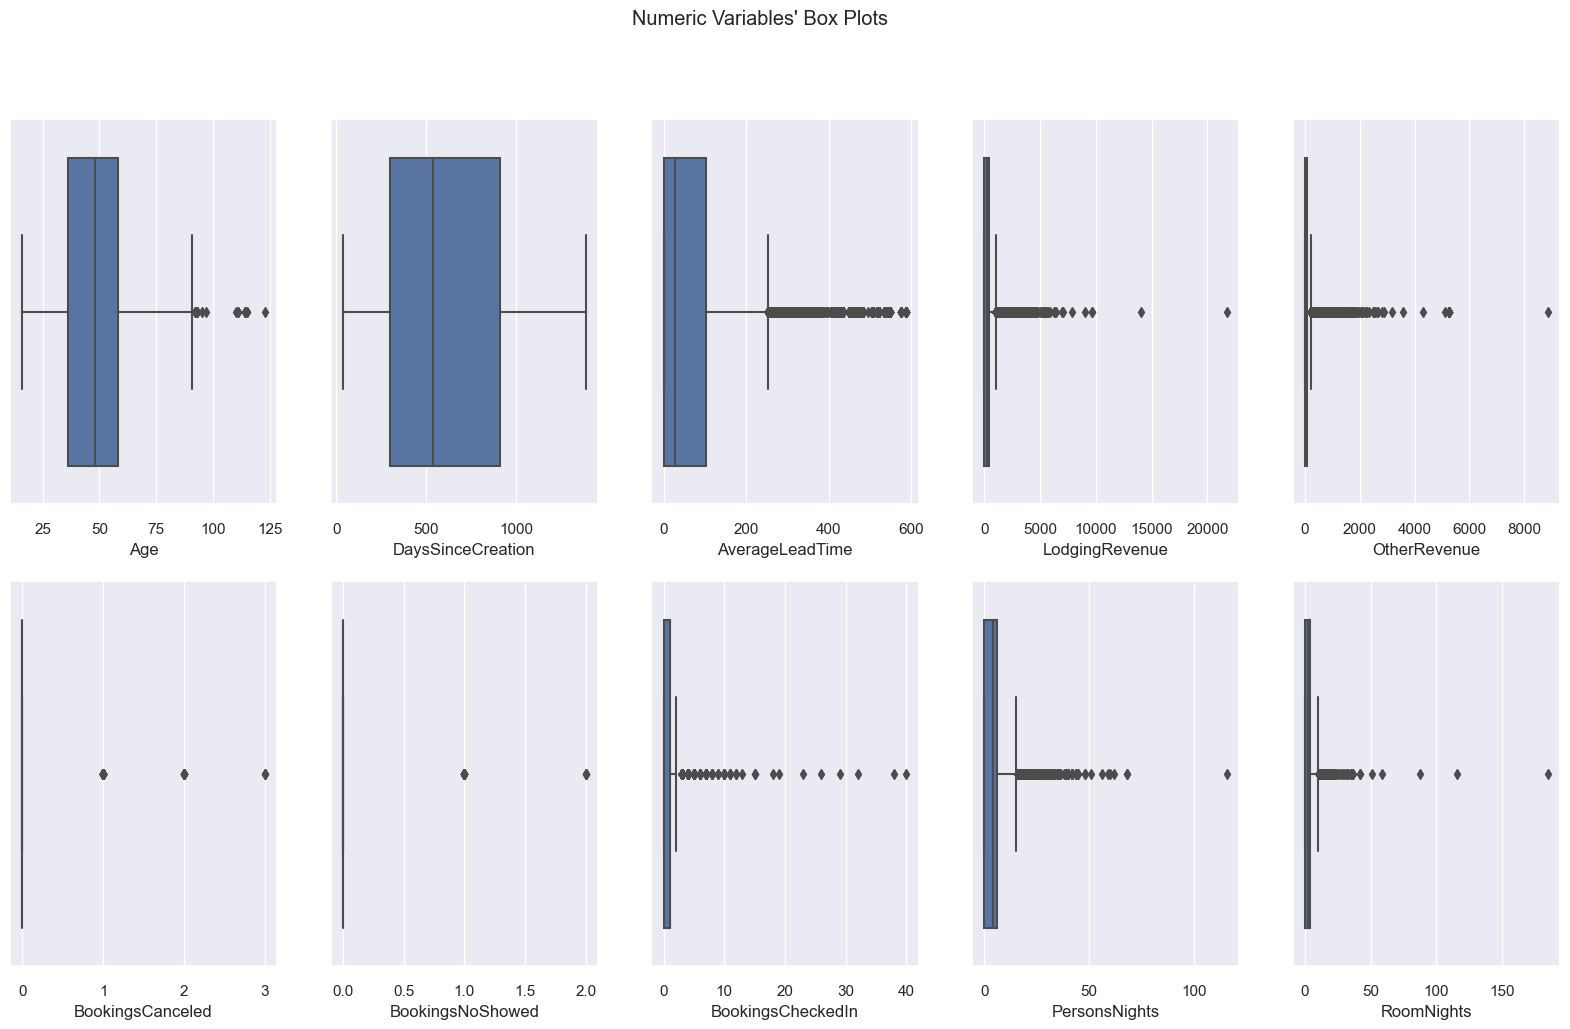

In [39]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

# Save the figure
if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))
    
plt.show()

In [40]:
filters1 = (
    (df['Age'] <= 90)&
    (df['AverageLeadTime']<=400)&
    (df['LodgingRevenue']<=5000)&
    (df['OtherRevenue']<=2000)&
    (df['BookingsCheckedIn']<=10)&    
    (df['RoomNights']<=25)
)

df1 = df[filters1]

In [41]:
df1['Age'].unique()

array([52., 48., 32., 61., 55., 50., 33., 43., 26., 28., 59., 57., 58.,
       69., 73., 72., 25., 27., 51., 53., 37., 65., 66., 68., 44., 31.,
       29., 19., 54., 49., 18., 39., 41., 40., 60., 62., 70., 56., 71.,
       35., 67., 83., 36., 63., 64., 46., 38., 30., 45., 34., 47., 21.,
       75., 74., 42., 23., 20., 79., 78., 22., 77., 76., 16., 84., 24.,
       81., 80., 17., 82., 85., 86., 88., 90., 89., 87.])

In [42]:
print('Percentage of data kept after removing outliers:', np.round(df1.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9912


In [43]:
df1.isna().sum()

Nationality            0
Age                    0
DaysSinceCreation      0
NameHash               0
DocIDHash              0
AverageLeadTime        0
LodgingRevenue         0
OtherRevenue           0
BookingsCanceled       0
BookingsNoShowed       0
BookingsCheckedIn      0
PersonsNights          0
RoomNights             0
DistributionChannel    0
MarketSegment          0
SRHighFloor            0
SRCrib                 0
SRKingSizeBed          0
SRTwinBed              0
SRQuietRoom            0
dtype: int64

#### Handling Data Types

In [44]:
float_cols = df1.select_dtypes(include=['float64']).columns

# Converter essas colunas para int64
df1[float_cols] = df1[float_cols].astype('int64')

In [45]:
df['OtherRevenue'].unique()

array([ 82.3 ,  53.  ,   0.  , ..., 495.35, 123.7 , 216.1 ])

In [46]:
df1.dtypes

Nationality            object
Age                     int64
DaysSinceCreation       int64
NameHash               object
DocIDHash              object
AverageLeadTime         int64
LodgingRevenue          int64
OtherRevenue            int64
BookingsCanceled        int64
BookingsNoShowed        int64
BookingsCheckedIn       int64
PersonsNights           int64
RoomNights              int64
DistributionChannel    object
MarketSegment          object
SRHighFloor             int64
SRCrib                  int64
SRKingSizeBed           int64
SRTwinBed               int64
SRQuietRoom             int64
dtype: object

In [47]:
df1

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom
0,PRT,52,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292,82,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0
1,PRT,48,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280,53,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0
2,DEU,32,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0,0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0
3,FRA,61,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240,60,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0
4,FRA,52,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0,0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105873,DEU,31,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0,0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,1,0,0
105874,BRA,43,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755,20,0,0,1,10,5,Travel Agent/Operator,Other,0,0,1,0,0
105875,BRA,37,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0,0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,1,0,0
105876,DEU,48,36,0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...,0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...,66,708,185,0,0,1,8,4,Travel Agent/Operator,Other,0,0,0,0,0


In [48]:
# Count the number of negatives in the Age column
number_of_negatives = df1[df1['Age'] < 0].shape[0]

# Calculate the total number of entries
total_entries = df1.shape[0]

# Calculate the percentage of negatives
percentage_of_negatives = (number_of_negatives / total_entries) * 100

# Print the results
print(f"Number of negatives: {number_of_negatives}")
print(f"Percentage of negatives: {percentage_of_negatives:.5f}%")

Number of negatives: 0
Percentage of negatives: 0.00000%


In [49]:
df1['Age'].value_counts()

Age
48    6348
51    2430
52    2405
54    2375
55    2362
      ... 
86      67
87      55
88      42
89      34
90       6
Name: count, Length: 75, dtype: int64

In [50]:
# Check missing values
df1.isna().sum()

Nationality            0
Age                    0
DaysSinceCreation      0
NameHash               0
DocIDHash              0
AverageLeadTime        0
LodgingRevenue         0
OtherRevenue           0
BookingsCanceled       0
BookingsNoShowed       0
BookingsCheckedIn      0
PersonsNights          0
RoomNights             0
DistributionChannel    0
MarketSegment          0
SRHighFloor            0
SRCrib                 0
SRKingSizeBed          0
SRTwinBed              0
SRQuietRoom            0
dtype: int64

In [51]:
#Without segmentation value
df1.drop(columns=['DocIDHash', 'NameHash'], inplace=True)

In [52]:
pd.set_option('display.max_columns', None)

In [53]:
df1.head(800)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom
0,PRT,52,440,59,292,82,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0
1,PRT,48,1385,61,280,53,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0
2,DEU,32,1385,0,0,0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0
3,FRA,61,1385,93,240,60,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0
4,FRA,52,1385,0,0,0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,PRT,81,1354,0,201,75,0,0,1,6,3,Direct,Direct,0,0,0,0,0
839,ITA,57,1354,81,146,26,0,0,1,4,2,Direct,Direct,1,0,0,0,0
840,ITA,54,1354,0,0,0,0,0,0,0,0,Direct,Direct,1,0,0,0,0
841,ITA,55,1354,81,146,33,0,0,1,4,2,Direct,Direct,1,0,0,0,0


#### Visualizations

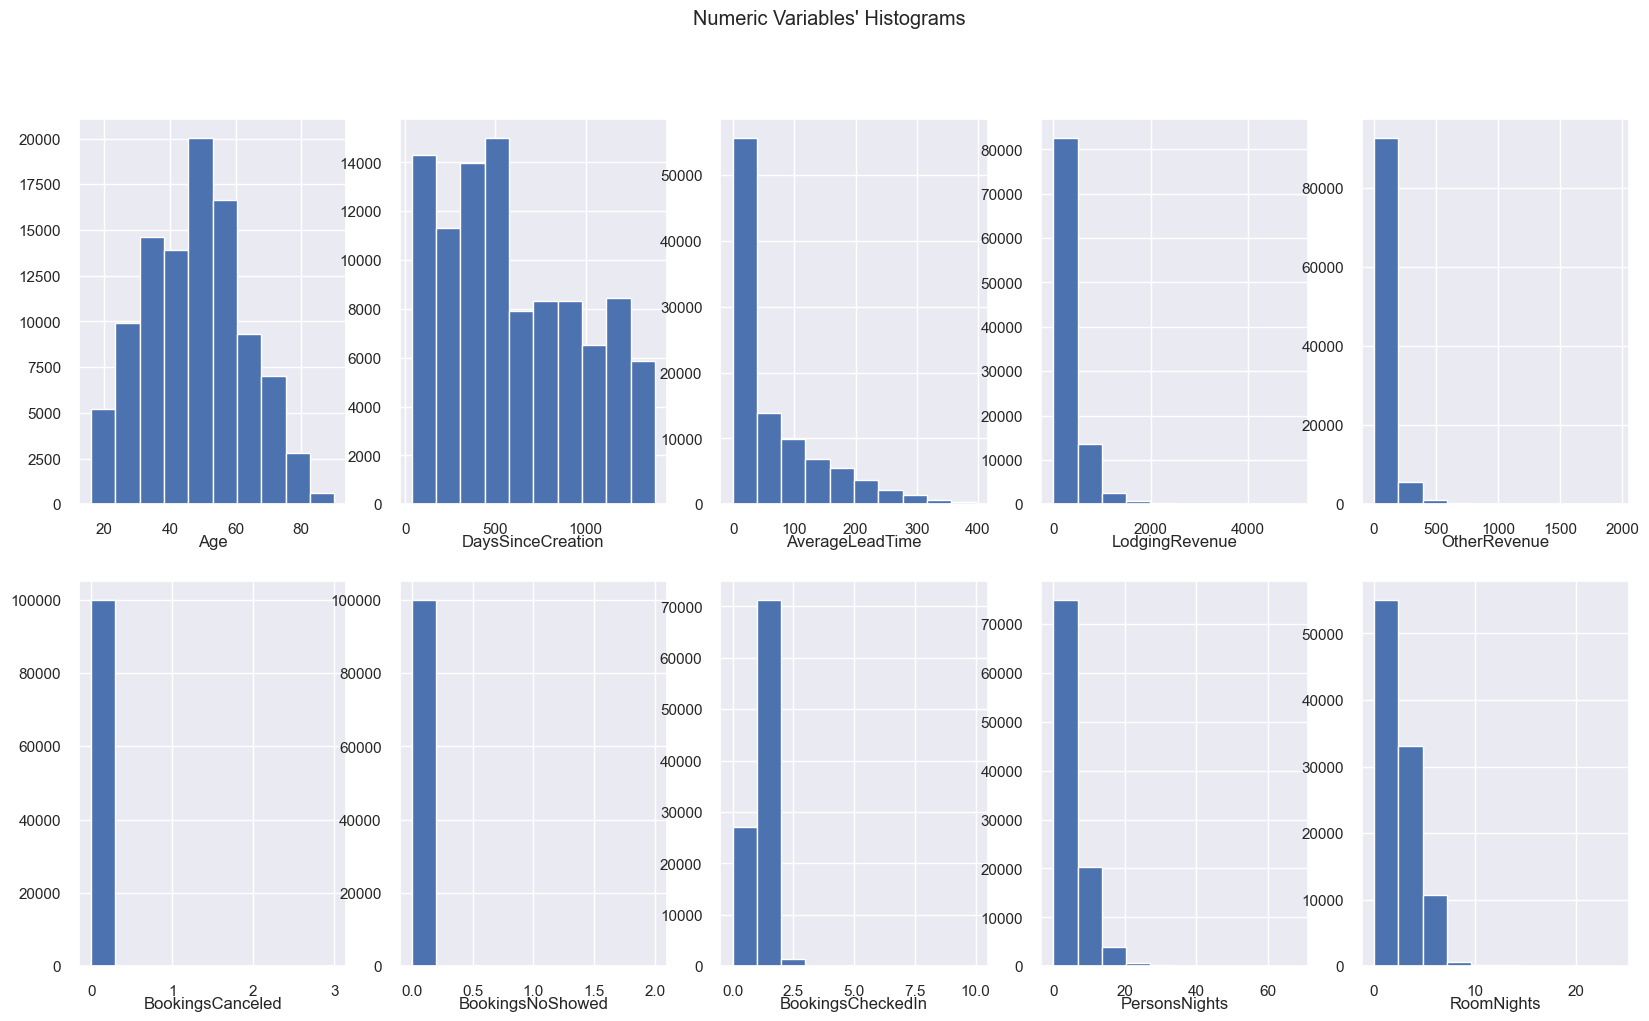

In [54]:
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df1[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))
    
#plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'numeric_variables_histograms.png'), dpi=200)

plt.show()

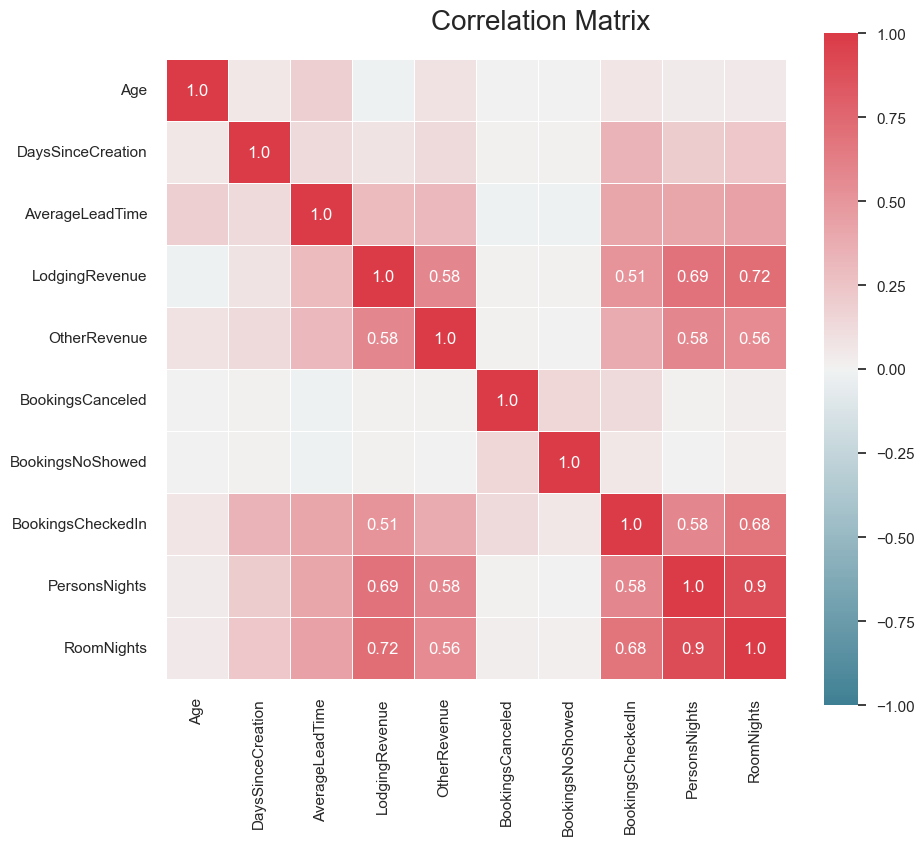

In [55]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df1[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'correlation_matrix.png'), dpi=200)

plt.show()

In [56]:
correlation_matrix = df1[metric_features].corr()
print(correlation_matrix)

                        Age  DaysSinceCreation  AverageLeadTime  \
Age                1.000000           0.064433         0.185790   
DaysSinceCreation  0.064433           1.000000         0.134148   
AverageLeadTime    0.185790           0.134148         1.000000   
LodgingRevenue    -0.005568           0.084819         0.299256   
OtherRevenue       0.089595           0.126100         0.305096   
BookingsCanceled   0.001393           0.013302        -0.012090   
BookingsNoShowed   0.004616           0.011014        -0.007168   
BookingsCheckedIn  0.072128           0.344503         0.422051   
PersonsNights      0.037927           0.214357         0.417670   
RoomNights         0.052626           0.227732         0.427138   

                   LodgingRevenue  OtherRevenue  BookingsCanceled  \
Age                     -0.005568      0.089595          0.001393   
DaysSinceCreation        0.084819      0.126100          0.013302   
AverageLeadTime          0.299256      0.305096        

At feature selection: check correlation and remove one of this two variables: RoomNights and PersonNights (highly correlated).

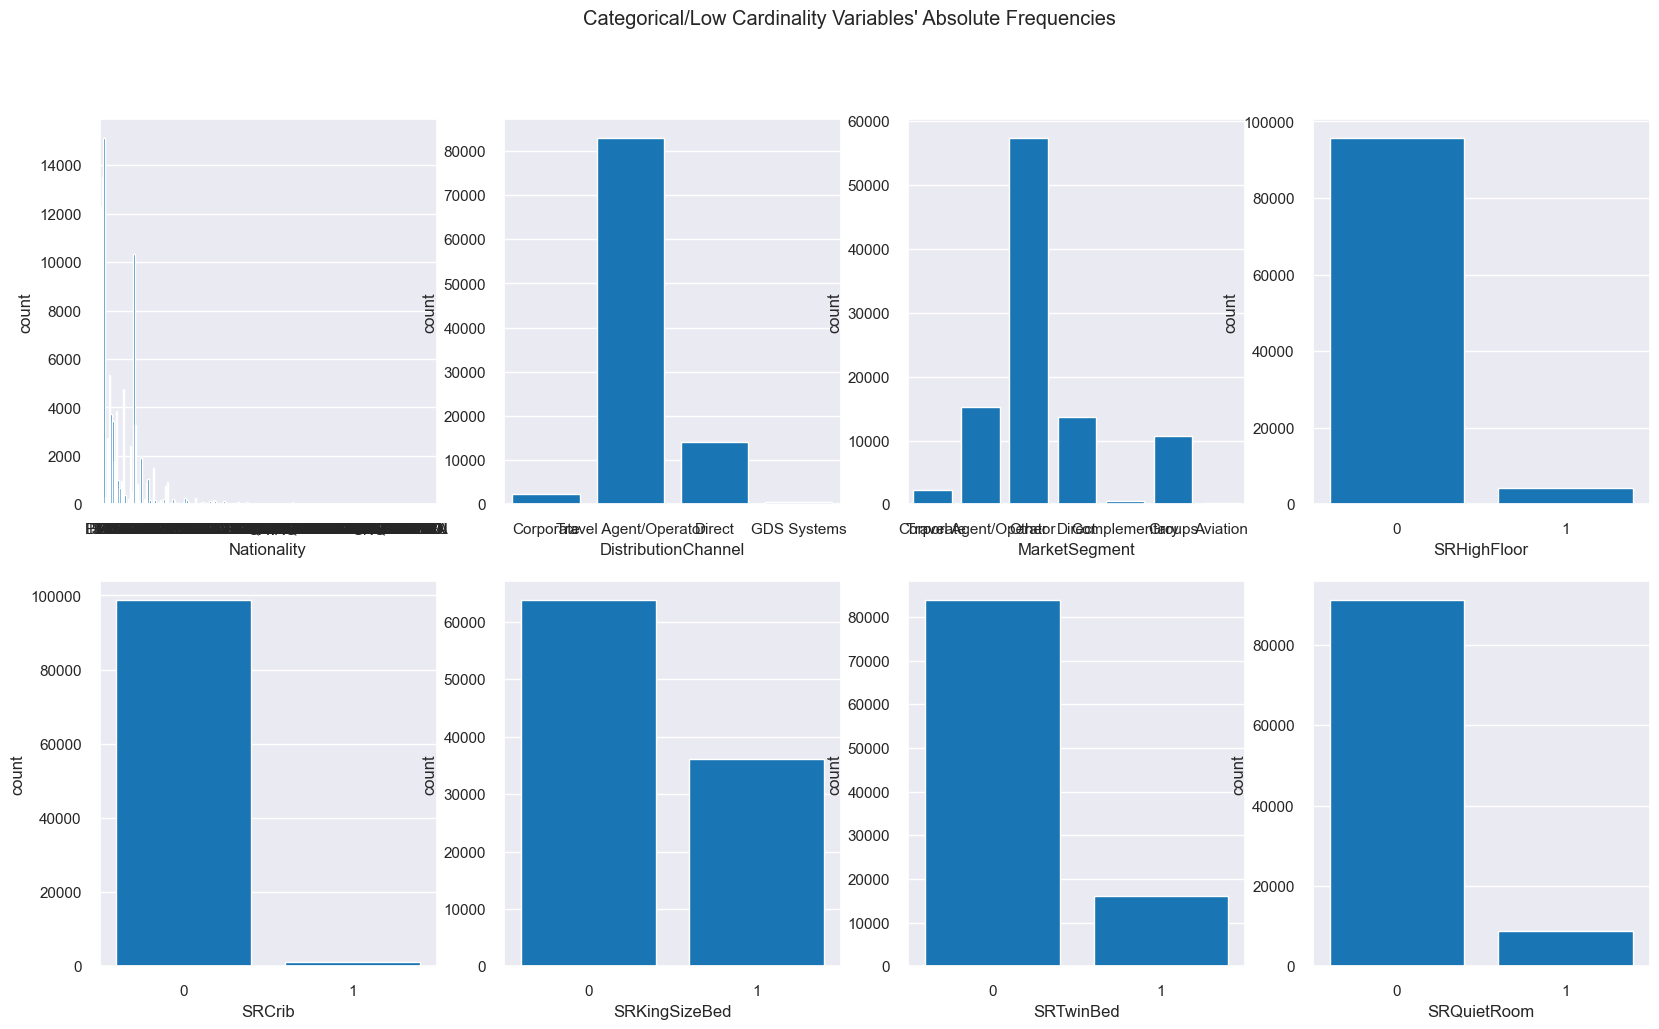

In [57]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=df1[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'categorical_variables_frequecies.png'), dpi=200)
plt.show()

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100049 entries, 0 to 105877
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Nationality          100049 non-null  object
 1   Age                  100049 non-null  int64 
 2   DaysSinceCreation    100049 non-null  int64 
 3   AverageLeadTime      100049 non-null  int64 
 4   LodgingRevenue       100049 non-null  int64 
 5   OtherRevenue         100049 non-null  int64 
 6   BookingsCanceled     100049 non-null  int64 
 7   BookingsNoShowed     100049 non-null  int64 
 8   BookingsCheckedIn    100049 non-null  int64 
 9   PersonsNights        100049 non-null  int64 
 10  RoomNights           100049 non-null  int64 
 11  DistributionChannel  100049 non-null  object
 12  MarketSegment        100049 non-null  object
 13  SRHighFloor          100049 non-null  int64 
 14  SRCrib               100049 non-null  int64 
 15  SRKingSizeBed        100049 non-null  i

# Feature selection

### RoomNights and PersonNights

In [59]:
#Pearson correlation between 'RoomNights' and 'PersonsNights'
correlation_pearson = df1['RoomNights'].corr(df1['PersonsNights'])

correlation_pearson

0.9027586092436741

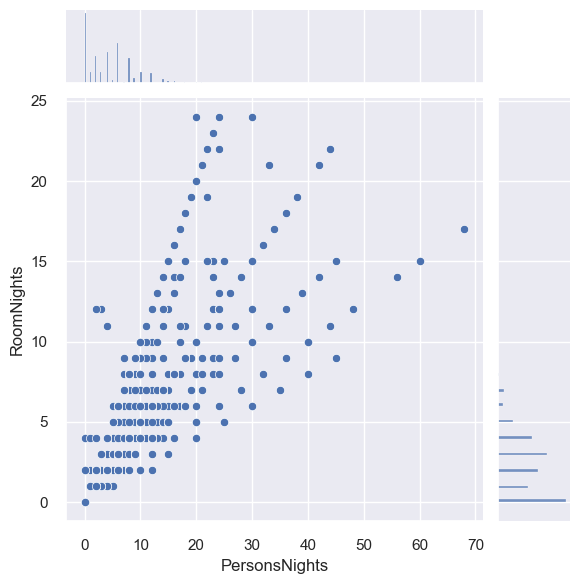

In [60]:
# making a joint plot with default formatting
sns.jointplot(data=df1, x='PersonsNights', y='RoomNights')
plt.show()

In [61]:
df1.drop(columns=['BookingsNoShowed'], inplace = True)
df1.drop(columns=['PersonsNights'], inplace = True)

#Update metric features 
metric_features.remove('BookingsNoShowed')
metric_features.remove('PersonsNights')

### Market Segment and DistributionChannel Categories

In [62]:
# Get the value counts
market_segment_counts = df1['MarketSegment'].value_counts()

# Calculate percentages using Series division with multiplication by 100
percentages = (market_segment_counts / len(df1)) * 100
percentages

MarketSegment
Other                    57.391878
Travel Agent/Operator    15.171566
Direct                   13.702286
Groups                   10.775720
Corporate                 2.262891
Complementary             0.513748
Aviation                  0.181911
Name: count, dtype: float64

In [63]:
# Get the value counts
dist_channel_counts = df1['DistributionChannel'].value_counts()

# Calculate percentages using Series division with multiplication by 100
percentages = (dist_channel_counts / len(df1)) * 100
percentages

DistributionChannel
Travel Agent/Operator    82.942358
Direct                   14.109087
Corporate                 2.371838
GDS Systems               0.576717
Name: count, dtype: float64

We verify that these variables aren't very imbalanced.

### Market Segment and DistributionChannel Cramer`s V

In [64]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df1['MarketSegment'], df1['DistributionChannel'])


chi2, p, dof, expected = chi2_contingency(contingency_table)


n = contingency_table.sum().sum()  # Total observations
min_dim = min(contingency_table.shape) - 1  # Minimum dimension minus 1
cramers_v = np.sqrt(chi2 / (n * min_dim))



In [65]:
cramers_v 

0.7022944840165288

Moderate association between the MarketSegment and DistributionChannel.

### Market Segment and DistributionChannel Chi-Square

In [66]:
# Perform the Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f"p-value for Chi-Square test of independence: {p_value}")

p-value for Chi-Square test of independence: 0.0


Highly statistically significant result.

- Looking to these results, we were decided not to remove one of these variables (V de Cramer is not high enough, none of them is very imbalanced). 
- However, looking at the business side of the problem, we will remove 'MarketSegment', since it's the old variable that is being update to a new one, so it will eventually be remove.

# Feature Engineering

In [67]:
df2 = df1.copy()

In [68]:
df2.head(3)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsCheckedIn,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom
0,PRT,52,440,59,292,82,1,2,4,Corporate,Corporate,0,0,0,0,0
1,PRT,48,1385,61,280,53,0,1,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0
2,DEU,32,1385,0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0


### Nationality

In [69]:
# Get the value counts
nationality_counts = df2['Nationality'].value_counts()

# Calculate the total number of entries
total_entries = len(df2)

# Calculate percentages using Series division with multiplication by 100
percentages = (nationality_counts / total_entries) * 100
percentages

Nationality
FRA    15.127587
DEU    13.521375
PRT    12.312967
GBR    10.309948
ESP     5.345381
         ...    
BHS     0.001000
TZA     0.001000
DMA     0.001000
FRO     0.001000
BDI     0.001000
Name: count, Length: 191, dtype: float64

In [70]:
#Create a dictionary for encoding nationalities above 5% and 'Other' (correspondent to o)
nationality_codes = {'FRA': 1, 'DEU': 2, 'PRT': 3, 'GBR': 4, 'ESP': 5, 'USA': 6}
nationality_codes.update({nat: 0 for nat in df2['Nationality'].unique() if nat not in nationality_codes})

# Apply the encoding to the 'Nationality' column
df2['Nationality_Code'] = df2['Nationality'].map(nationality_codes).astype(int)

#Drop the 'Nationality' column from df2
df2.drop('Nationality', axis='columns', inplace=True)

In [71]:
df2.head(30)

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsCheckedIn,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,Nationality_Code
0,52,440,59,292,82,1,2,4,Corporate,Corporate,0,0,0,0,0,3
1,48,1385,61,280,53,0,1,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,3
2,32,1385,0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,2
3,61,1385,93,240,60,0,1,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,1
4,52,1385,0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,1
5,55,1385,58,230,24,0,1,2,Travel Agent/Operator,Other,0,0,0,0,0,0
6,50,1385,0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0
7,33,1385,38,535,94,0,1,5,Travel Agent/Operator,Other,0,0,1,0,0,1
8,43,1385,0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,1,0,0,1
9,26,1385,96,174,69,0,1,3,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0


In [72]:
df2['Nationality_Code'].value_counts()

Nationality_Code
0    38655
1    15135
2    13528
3    12319
4    10315
5     5348
6     4749
Name: count, dtype: int64

### Age

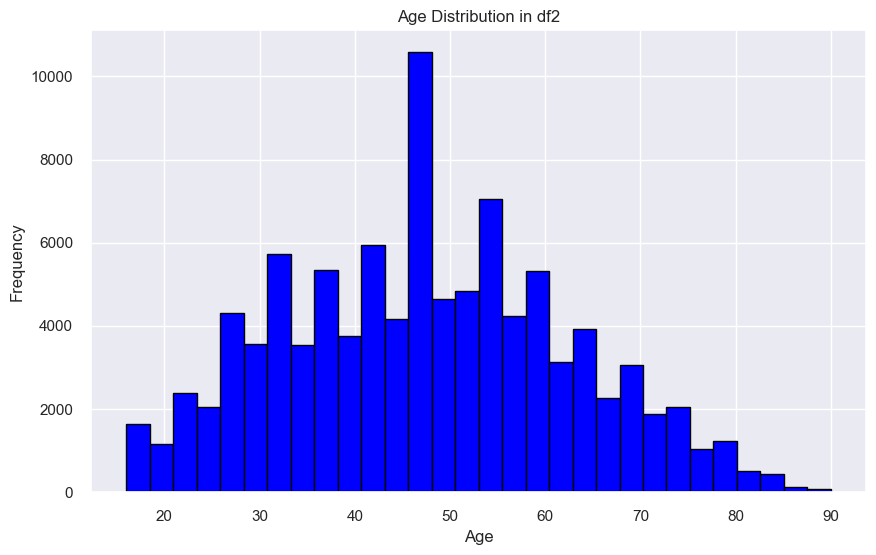

In [73]:
# Plotting the distribution of the 'Age' variable
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.hist(df2['Age'], bins=30, color='blue', edgecolor='black')  # Create histogram
plt.title('Age Distribution in df2')  # Set title
plt.xlabel('Age')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.grid(True)  # Show grid
plt.show()  # Display the histogram

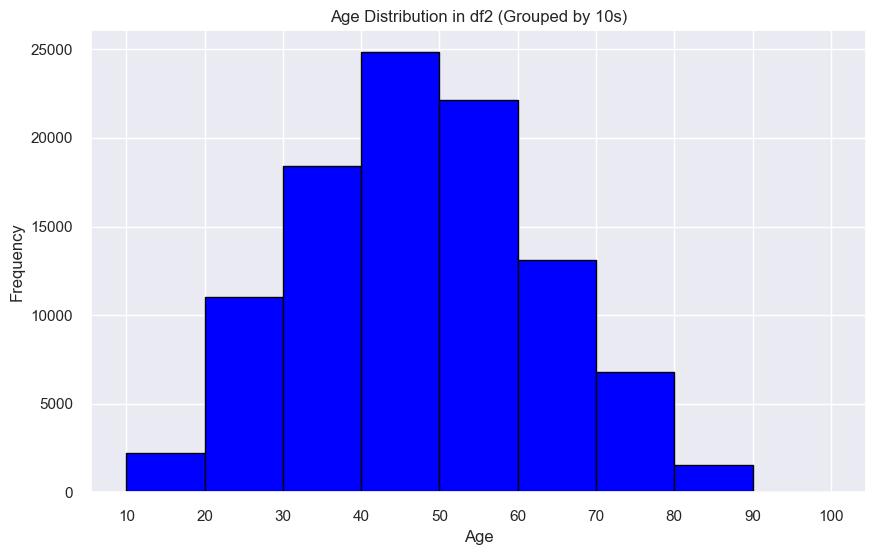

In [74]:
# Calculate the minimum and maximum values rounded to the nearest 10 for bin edges
min_age = df2['Age'].min() - (df2['Age'].min() % 10)
max_age = df2['Age'].max() + (10 - df2['Age'].max() % 10)

# Generate bins from min to max with a step of 10
bins = np.arange(min_age, max_age + 10, 10)  # +10 to include the last edge

# Plotting the distribution of the 'Age' variable with specified bins
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.hist(df2['Age'], bins=bins, color='blue', edgecolor='black')  # Create histogram with custom bins
plt.title('Age Distribution in df2 (Grouped by 10s)')  # Set title
plt.xlabel('Age')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.xticks(bins)  # Set x-axis ticks to match the bins
plt.grid(True)  # Show grid
plt.show()  # Display the histogram

In [75]:
# Bin the age
df2['age_bins'] = pd.cut(x=df2['Age'], 
                         bins=[-1, 24, 35, 45, 55, 65, 95], 
                         labels=['<25', '25-35', '36-45', '46-55', '56-65', '>=66'])

# Drop the age column

df2.drop(columns='Age', inplace=True)

In [76]:
df2['age_bins'].unique()

['46-55', '25-35', '56-65', '36-45', '>=66', '<25']
Categories (6, object): ['<25' < '25-35' < '36-45' < '46-55' < '56-65' < '>=66']

In [77]:
df1['Age'].unique()

array([52, 48, 32, 61, 55, 50, 33, 43, 26, 28, 59, 57, 58, 69, 73, 72, 25,
       27, 51, 53, 37, 65, 66, 68, 44, 31, 29, 19, 54, 49, 18, 39, 41, 40,
       60, 62, 70, 56, 71, 35, 67, 83, 36, 63, 64, 46, 38, 30, 45, 34, 47,
       21, 75, 74, 42, 23, 20, 79, 78, 22, 77, 76, 16, 84, 24, 81, 80, 17,
       82, 85, 86, 88, 90, 89, 87])

In [78]:
num_zeros = (df1['Age'] == 0).sum()
num_zeros

0

In [79]:
# Contando quantos valores negativos existem
num_negatives = (df1['Age'] < 0).sum()
num_negatives

0

### Distribution Channel

In [80]:
# Mapping dictionary as per user's instructions
def map_distribution_channel(channel):
    channel_mapping = {
        'Travel Agent/Operator': 1,
        'Direct': 2,
        
    }
    return channel_mapping.get(channel, 3)

# Apply the mapping, with a default value for unspecified categories
df2['ChannelCode'] = df2['DistributionChannel'].apply(map_distribution_channel)

#df2.head(6)

As mentioned before, we will remove 'MarketSegment':

In [81]:
df2.drop(['MarketSegment'], axis=1, inplace=True)

#Update non-metric features 
non_metric_features.remove('MarketSegment')

# New variables construction

### Total Revenue 

In [82]:
df2['TotalRevenue'] = (df2['LodgingRevenue'] + df2['OtherRevenue'])


In [83]:
df2.drop(['OtherRevenue', 'LodgingRevenue'], axis=1, inplace=True)

In [84]:
metric_features.remove('LodgingRevenue')  
metric_features.remove('OtherRevenue')

In [85]:
df2['TotalRevenue'].value_counts()

TotalRevenue
0       27440
308       674
234       538
302       284
182       265
        ...  
2986        1
3252        1
1860        1
2558        1
1497        1
Name: count, Length: 2636, dtype: int64

### Cancellation Rate

In [86]:
df2['CancellationRate'] = df2['BookingsCanceled'] / (df2['BookingsCheckedIn'] + df2['BookingsCanceled'] +0.01)


In [87]:
df2['CancellationRate'].value_counts() #is it relevant? 99% of 0 values

CancellationRate
0.000000    99972
0.497512       28
0.332226       20
0.199601        5
0.124844        4
0.249377        4
0.166389        3
0.142653        2
0.664452        2
0.272480        1
0.249688        1
0.995025        1
0.249792        1
0.221976        1
0.090827        1
0.299700        1
0.498753        1
0.166528        1
Name: count, dtype: int64

In [88]:
df2.drop(['BookingsCanceled'], axis=1, inplace=True)

In [89]:
#df2.drop(['BookingsCheckedIn'], axis=1, inplace=True)

In [90]:
metric_features.remove('BookingsCanceled') 
#metric_features.remove('BookingsCheckedIn')# Remove "BookingsCanceled"

### Total Special Requests

In [91]:
special_requests = ['SRHighFloor', 'SRQuietRoom', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed']
df2['TotalSpecialRequests'] = df2[special_requests].sum(axis=1)

In [92]:
df2['TotalSpecialRequests'].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
105873    1
105874    1
105875    1
105876    0
105877    0
Name: TotalSpecialRequests, Length: 100049, dtype: int64>

In [93]:
df2['TotalSpecialRequests'].unique()

array([0, 1, 2, 3, 4])

In [94]:
df2.head(10)

,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,RoomNights,DistributionChannel,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,Nationality_Code,age_bins,ChannelCode,TotalRevenue,CancellationRate,TotalSpecialRequests
0,440,59,2,4,Corporate,0,0,0,0,0,3,46-55,3,374,0.332226,0
1,1385,61,1,5,Travel Agent/Operator,0,0,0,0,0,3,46-55,1,333,0.000000,0
2,1385,0,0,0,Travel Agent/Operator,0,0,0,0,0,2,25-35,1,0,0.000000,0
3,1385,93,1,5,Travel Agent/Operator,0,0,0,0,0,1,56-65,1,300,0.000000,0
4,1385,0,0,0,Travel Agent/Operator,0,0,0,0,0,1,46-55,1,0,0.000000,0
5,1385,58,1,2,Travel Agent/Operator,0,0,0,0,0,0,46-55,1,254,0.000000,0
6,1385,0,0,0,Travel Agent/Operator,0,0,0,0,0,0,46-55,1,0,0.000000,0
7,1385,38,1,5,Travel Agent/Operator,0,0,1,0,0,1,25-35,1,629,0.000000,1
8,1385,0,0,0,Travel Agent/Operator,0,0,1,0,0,1,36-45,1,0,0.000000,1
9,1385,96,1,3,Travel Agent/Operator,0,0,0,0,0,0,25-35,1,243,0.000000,0


In [95]:
df2.dtypes

DaysSinceCreation          int64
AverageLeadTime            int64
BookingsCheckedIn          int64
RoomNights                 int64
DistributionChannel       object
SRHighFloor                int64
SRCrib                     int64
SRKingSizeBed              int64
SRTwinBed                  int64
SRQuietRoom                int64
Nationality_Code           int64
age_bins                category
ChannelCode                int64
TotalRevenue               int64
CancellationRate         float64
TotalSpecialRequests       int64
dtype: object

In [96]:
# Lista de colunas para converter de float64 para int64
cols_to_convert = ['TotalRevenue', 'CancellationRate']

# Converter cada coluna para int64
for col in cols_to_convert:
     df2[col] = df2[col].round().astype('int64')

In [97]:
df2['age_bins'].value_counts().sum()

100049

In [98]:
# Updating metric_features list
metric_features.remove("Age")  # Remove "Age"
metric_features.append("age_bins")  # Add "age_beans"
# Add new features to the metric_features list
new_metric_features = [
    "TotalSpecialRequests", "TotalRevenue",  'CancellationRate'
]
metric_features.extend(new_metric_features)

# Updating non_metric_features list
non_metric_features[non_metric_features.index("Nationality")] = "Nationality_Code"
non_metric_features[non_metric_features.index("DistributionChannel")] = "ChannelCode"

#Drop the 'DistributionChannel' column from df2
df2.drop('DistributionChannel', axis='columns', inplace=True)

# Displaying the updated lists
metric_features, non_metric_features

(['DaysSinceCreation',
  'AverageLeadTime',
  'BookingsCheckedIn',
  'RoomNights',
  'age_bins',
  'TotalSpecialRequests',
  'TotalRevenue',
  'CancellationRate'],
 ['Nationality_Code',
  'ChannelCode',
  'SRHighFloor',
  'SRCrib',
  'SRKingSizeBed',
  'SRTwinBed',
  'SRQuietRoom'])

# One Hot Encoding

In [99]:
df3=df2.copy()

In [100]:
import category_encoders as ce

# List of categorical variables to be encoded
cols = [
    'Nationality_Code',
    'ChannelCode',
    'SRHighFloor',
    'SRCrib',
    'SRKingSizeBed',
    'SRTwinBed',
    'SRQuietRoom',
    'age_bins',
    'TotalSpecialRequests'
]

# Initialize the OneHotEncoder with the specified columns
ce_one_hot = ce.OneHotEncoder(cols=cols, use_cat_names=True)

# Apply the encoder to your dataframe
df3 = ce_one_hot.fit_transform(df3)

In [101]:
df3.head(5)

,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,RoomNights,SRHighFloor_0.0,SRHighFloor_1.0,SRCrib_0.0,SRCrib_1.0,SRKingSizeBed_0.0,SRKingSizeBed_1.0,SRTwinBed_0.0,SRTwinBed_1.0,SRQuietRoom_0.0,SRQuietRoom_1.0,Nationality_Code_3.0,Nationality_Code_2.0,Nationality_Code_1.0,Nationality_Code_0.0,Nationality_Code_5.0,Nationality_Code_6.0,Nationality_Code_4.0,age_bins_<25,age_bins_25-35,age_bins_36-45,age_bins_46-55,age_bins_56-65,age_bins_>=66,ChannelCode_3.0,ChannelCode_1.0,ChannelCode_2.0,TotalRevenue,CancellationRate,TotalSpecialRequests_0.0,TotalSpecialRequests_1.0,TotalSpecialRequests_2.0,TotalSpecialRequests_3.0,TotalSpecialRequests_4.0
0,440,59,2,4,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,374,0,1,0,0,0,0
1,1385,61,1,5,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,333,0,1,0,0,0,0
2,1385,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1385,93,1,5,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,300,0,1,0,0,0,0
4,1385,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


# Data normalization

In [102]:
# Get a copy of the dataframe before normalization for results' analysis
df_beforeNorm = df3.copy(deep=True)

In [103]:
# Normalize all columns
# MinMax scaler returns an array, so the dataframe must be recreated
df3_norm = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df3.values), columns=df3.columns,index=df3.index)

In [104]:
# Check dataframe structure and statistics after all transformations
print(df3_norm.shape)
df3_norm.describe(include='all').T

(100049, 37)


,count,mean,std,min,25%,50%,75%,max
DaysSinceCreation,100049.0,0.422840,0.279820,0.0,0.191253,0.369162,0.647887,1.0
AverageLeadTime,100049.0,0.157812,0.199222,0.0,0.002519,0.070529,0.251889,1.0
BookingsCheckedIn,100049.0,0.074856,0.049722,0.0,0.000000,0.100000,0.100000,1.0
RoomNights,100049.0,0.095250,0.084825,0.0,0.000000,0.083333,0.166667,1.0
SRHighFloor_0.0,100049.0,0.957031,0.202788,0.0,1.000000,1.000000,1.000000,1.0
SRHighFloor_1.0,100049.0,0.042969,0.202788,0.0,0.000000,0.000000,0.000000,1.0
SRCrib_0.0,100049.0,0.987876,0.109440,0.0,1.000000,1.000000,1.000000,1.0
SRCrib_1.0,100049.0,0.012124,0.109440,0.0,0.000000,0.000000,0.000000,1.0
SRKingSizeBed_0.0,100049.0,0.638257,0.480507,0.0,0.000000,1.000000,1.000000,1.0
SRKingSizeBed_1.0,100049.0,0.361743,0.480507,0.0,0.000000,0.000000,1.000000,1.0


- All variables are encoded and normalized.
- All columns are now numeric, with values in the range of 0 to 1.

# Analyze Principal Components

In [105]:
from sklearn.decomposition import PCA

# Fit the PCA algorithm to data 
pca = PCA().fit(df3_norm)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(df3_norm.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.211390,0.211390
1,2,0.116002,0.327392
2,3,0.080684,0.408076
3,4,0.070959,0.479036
4,5,0.067968,0.547004
5,6,0.063019,0.610023
6,7,0.051970,0.661993
7,8,0.048577,0.710570
8,9,0.041303,0.751873
9,10,0.036993,0.788865


Could use only 18 components (97.63% of variance).

Text(0.5, 1.0, 'Explained variance by components')

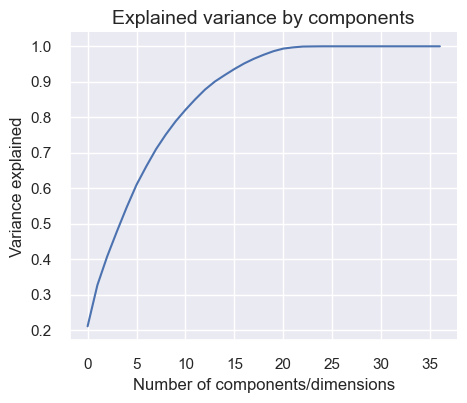

In [106]:
# Plot the cumulative explained variance

# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.title('Explained variance by components', fontsize=plots_Title_fontSize)

With 20 components is possible to explain 99.36% of the variance. But we can use less components and still have a good amount of variance explained, so we will continue with 18 components.

# Modeling - K-Means - 18 Components

In [107]:
# Apply the dimension reduction to the dataset (for 18 components)
pca_reduced = PCA(n_components = 18)
pca_reduced.fit(df3_norm)
df3_norm_pca_reduced = pca_reduced.transform(df3_norm) 
print(df3_norm_pca_reduced.shape)

(100049, 18)


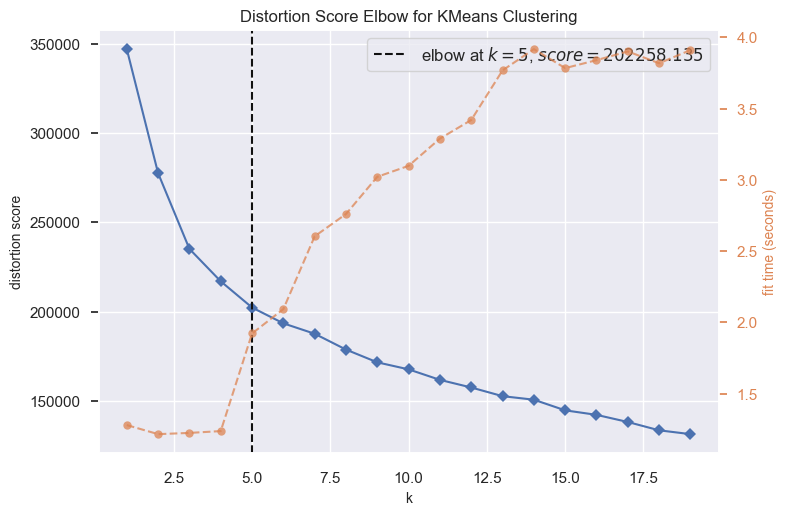

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [108]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,20), random_state=123)
visualizer.fit(df3_norm_pca_reduced)
visualizer.show() 

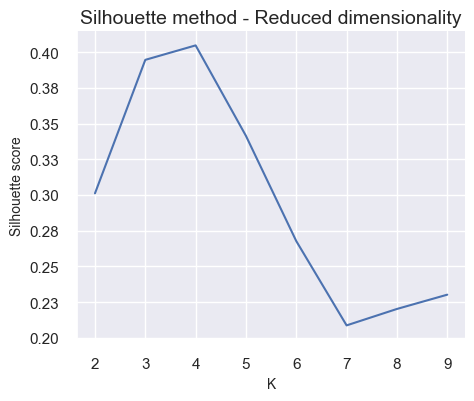

In [109]:
# Select K based on the Silhouette method
# ATTENTION! Depending on the computer this can take long time to run (more than 10 minutes)
sil = []

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, 10):
  km = KMeans(n_clusters = k, random_state=123).fit(df3_norm)
  labels = km.labels_
  sil.append(silhouette_score(df3_norm, labels, metric = 'manhattan'))


# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 10), sil, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes', labelsize=subPlots_label_fontSize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality', fontsize=plots_Title_fontSize);

The Elbow method indicates K should be 5, but the Silhouette method points to 4 clusters. We will consider the Silhouette the best method to choose the number of K and continue with K=4.

In [110]:
# Apply the K-Means for K4
K=4
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(df3_norm_pca_reduced)
y_kmeans = kmeans.predict(df3_norm_pca_reduced)

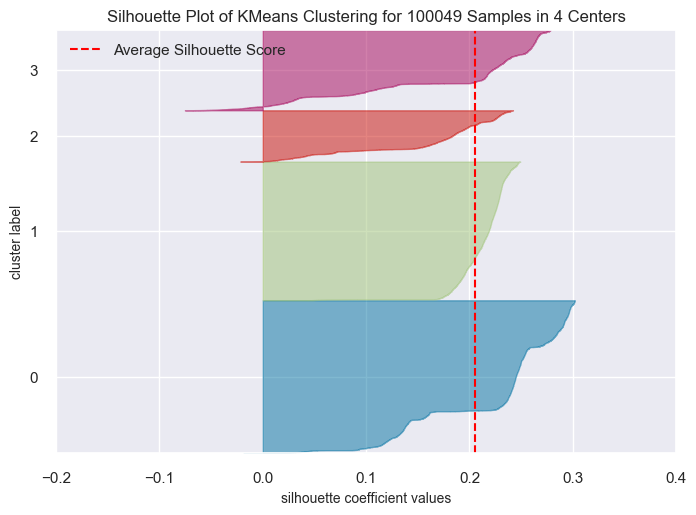

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 100049 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [111]:
# Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df3_norm_pca_reduced)
visualizer.show()

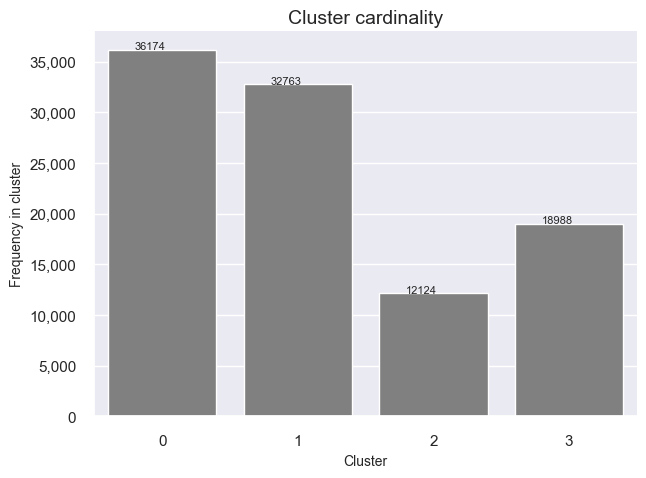

In [112]:
# Plot clusters cardinality 

# Count observations per cluster
freqByCluster = df_beforeNorm.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

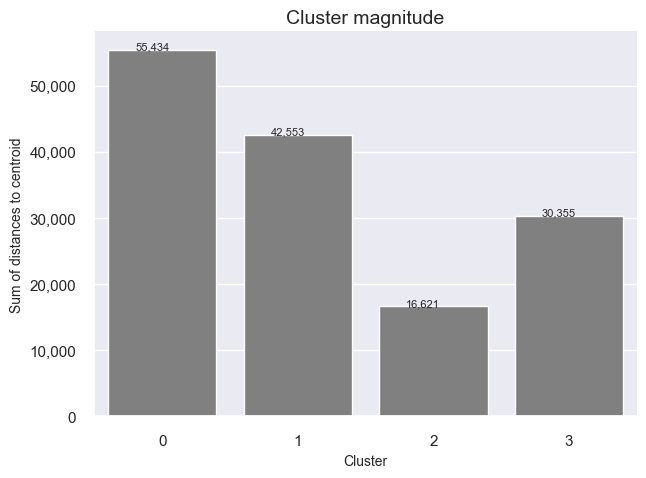

In [113]:
# Plot clusters magnitude

# Compute Magnitude
df3_norm['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = df3_norm['distanceToCentroid'].groupby(y_kmeans).sum()
df3_norm = df3_norm.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

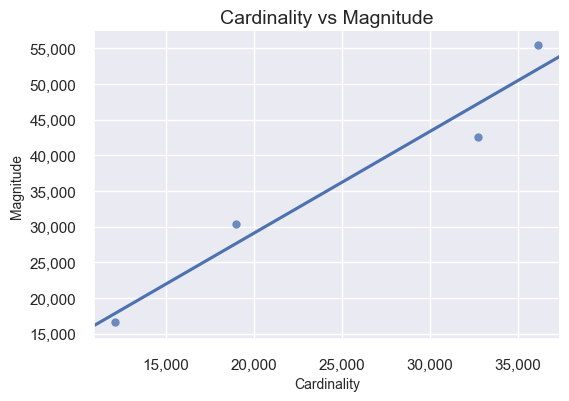

In [114]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

Cardinality is correlated to magnitude, therefore no major anomalies seems to exist in clusters.

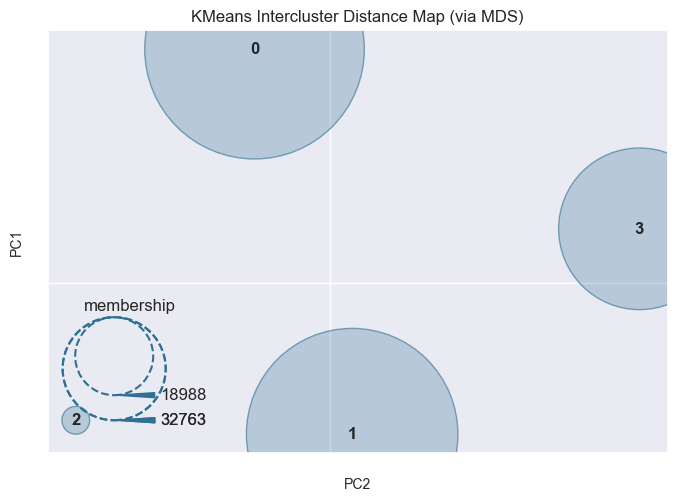

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [115]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(df3_norm_pca_reduced)
visualizer.show()

Circles represent the clusters (0 to 3). The cluster seem to be very distant, which is a good indicator.

In [116]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=df3_norm.columns)
wheightsDF

,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,RoomNights,SRHighFloor_0.0,SRHighFloor_1.0,SRCrib_0.0,SRCrib_1.0,SRKingSizeBed_0.0,SRKingSizeBed_1.0,SRTwinBed_0.0,SRTwinBed_1.0,SRQuietRoom_0.0,SRQuietRoom_1.0,Nationality_Code_3.0,Nationality_Code_2.0,Nationality_Code_1.0,Nationality_Code_0.0,Nationality_Code_5.0,Nationality_Code_6.0,Nationality_Code_4.0,age_bins_<25,age_bins_25-35,age_bins_36-45,age_bins_46-55,age_bins_56-65,age_bins_>=66,ChannelCode_3.0,ChannelCode_1.0,ChannelCode_2.0,TotalRevenue,CancellationRate,TotalSpecialRequests_0.0,TotalSpecialRequests_1.0,TotalSpecialRequests_2.0,TotalSpecialRequests_3.0,TotalSpecialRequests_4.0
0,-2.889737e-02,5.007118e-03,-2.868177e-03,4.171681e-04,-0.022923,0.022923,-0.005803,0.005803,-0.487358,0.487358,-0.031188,0.031188,-0.055006,0.055006,-0.046300,-0.019272,-0.005190,0.057207,-0.008882,0.009526,0.012911,0.003247,0.017105,-0.005591,-0.033956,0.004285,0.014910,-0.027203,0.121892,-0.094689,1.296742e-03,-3.943162e-06,-0.523985,0.450948,0.067794,0.005233,0.000011
1,-3.822509e-02,3.190926e-02,-4.775660e-03,-6.540265e-03,0.018749,-0.018749,0.006532,-0.006532,0.325110,-0.325110,-0.538488,0.538488,0.029212,-0.029212,-0.057576,0.069926,-0.050283,0.023985,-0.011365,0.003689,0.021624,0.026061,0.002425,-0.036666,-0.089152,-0.004553,0.101885,-0.015252,0.095251,-0.079999,-1.866370e-03,7.092312e-06,-0.236226,0.308620,-0.067435,-0.004970,0.000011
2,-3.977909e-02,-1.582198e-02,-3.437876e-03,3.298011e-03,-0.015018,0.015018,-0.004232,0.004232,0.025357,-0.025357,0.021971,-0.021971,-0.055471,0.055471,-0.214671,-0.187956,-0.226097,0.839021,-0.051090,-0.042798,-0.116409,0.018954,0.082933,0.140636,-0.294563,0.069943,-0.017904,-0.006608,0.029303,-0.022694,3.986159e-03,-4.829163e-05,0.037061,-0.098136,0.057690,0.003394,-0.000008
3,2.821436e-02,5.173220e-02,3.357793e-04,1.106098e-02,-0.076124,0.076124,0.001243,-0.001243,0.028453,-0.028453,-0.005565,0.005565,-0.309927,0.309927,-0.115339,0.149533,0.091114,-0.128931,-0.003589,-0.016943,0.024156,0.000566,0.008216,-0.081272,-0.089893,0.108287,0.054097,-0.054607,0.524414,-0.469807,2.707007e-03,-1.112576e-04,-0.009447,-0.322446,0.311362,0.020481,0.000050
4,3.066486e-02,-1.747552e-03,2.634002e-03,2.894147e-03,-0.035471,0.035471,0.006836,-0.006836,0.024789,-0.024789,-0.072814,0.072814,-0.154078,0.154078,0.110568,-0.093008,-0.149935,0.275757,-0.006861,-0.039932,-0.096589,-0.020361,-0.242581,-0.252411,0.785834,-0.164137,-0.106344,0.009642,-0.015956,0.006313,6.392172e-03,1.697647e-06,-0.081384,-0.059174,0.131767,0.008788,0.000004
5,-5.940305e-02,-3.463941e-02,-2.784174e-03,-7.133845e-03,-0.132276,0.132276,-0.024958,0.024958,0.000706,-0.000706,-0.131974,0.131974,-0.347457,0.347457,0.036652,-0.013252,0.039048,-0.132161,0.020749,0.021181,0.027784,0.011665,0.020803,0.181480,-0.170225,0.014171,-0.057893,0.025755,-0.443269,0.417514,4.659874e-03,7.916205e-05,-0.206214,-0.196480,0.375693,0.026950,0.000051
6,-3.971343e-02,-1.653405e-02,-5.354838e-03,-2.300207e-03,-0.020838,0.020838,-0.000402,0.000402,-0.006568,0.006568,0.005527,-0.005527,-0.010481,0.010481,-0.041913,0.022385,-0.015555,0.031351,-0.038679,0.007710,0.034699,0.008770,0.648274,-0.731950,-0.026778,0.102390,-0.000707,-0.001932,-0.104267,0.106200,-3.018948e-03,1.019064e-05,-0.003267,-0.023772,0.024591,0.002440,0.000008
7,4.923985e-03,6.426739e-02,2.650191e-03,1.023631e-02,0.023967,-0.023967,0.024387,-0.024387,-0.015927,0.015927,0.031104,-0.031104,-0.010898,0.010898,-0.068736,0.181089,-0.133687,0.016639,-0.001265,0.020815,-0.014854,0.012427,-0.503257,-0.299690,-0.069998,0.735908,0.124611,0.000408,-0.113900,0.113492,5.804466e-03,-2.716206e-05,0.007960,0.036228,-0.043654,-0.000582,0.000048
8,-7.403703e-02,7.799156e-02,1.348167e-04,-3.611665e-03,-0.015856,0.015856,0.000411,-0.000411,-0.046501,0.046501,0.057487,-0.057487,-0.007270,0.007270,0.035351,0.500954,-0.599434,-0.019146,-0.008236,0.038033,0.052477,0.001807,-0.023166,-0.020208,-0.065629,-0.359653,0.466850,0.009910,-0.048440,0.038531,-3.844055e-03,7.920766e-06,0.

In [117]:
# Study the weights of component 18
comp = abs(wheightsDF.iloc[19])  
comp = comp.sort_values(ascending=False)
comp

AverageLeadTime             0.859963
DaysSinceCreation           0.251223
ChannelCode_3.0             0.244929
RoomNights                  0.192089
TotalRevenue                0.133474
ChannelCode_2.0             0.127796
ChannelCode_1.0             0.117133
BookingsCheckedIn           0.107172
Nationality_Code_5.0        0.106453
Nationality_Code_2.0        0.094829
age_bins_>=66               0.071233
age_bins_<25                0.062310
Nationality_Code_3.0        0.060883
Nationality_Code_4.0        0.057041
age_bins_25-35              0.032093
SRHighFloor_0.0             0.025364
SRHighFloor_1.0             0.025364
Nationality_Code_6.0        0.024988
TotalSpecialRequests_2.0    0.019417
Nationality_Code_1.0        0.017732
SRTwinBed_0.0               0.015431
SRTwinBed_1.0               0.015431
age_bins_46-55              0.013502
TotalSpecialRequests_3.0    0.012630
age_bins_56-65              0.012603
Nationality_Code_0.0        0.008210
TotalSpecialRequests_1.0    0.007688
S

### Interpret clusters results


In [118]:
# Check the mean values of each cluster for top 30 relevant features
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(df_beforeNorm[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2,3
AverageLeadTime,59.784845,64.718585,41.311283,72.902517
DaysSinceCreation,584.593437,658.473034,614.065985,553.255108
ChannelCode_3.0,0.009952,0.000000,0.195398,0.011639
RoomNights,2.345828,2.387999,2.123062,2.100116
TotalRevenue,369.419638,342.882611,372.761217,360.102591
ChannelCode_2.0,0.085559,0.000000,0.804602,0.066674
ChannelCode_1.0,0.904489,1.000000,0.000000,0.921687
BookingsCheckedIn,0.738624,0.772335,0.802375,0.692121
Nationality_Code_5.0,0.049041,0.055764,0.073161,0.045292
Nationality_Code_2.0,0.102477,0.160211,0.084213,0.187013


#### Insights:

**Cluster 0**: This cluster shows people from other parts of the world (nationality code 0). The customers of this group tend to be between the ages of 25 and 35. This group shows the most Total special Requests (2 and 3), however, no requirements for twin beds, Higher floor, quiet room or cribs, so it can be assumed that this group represents young Workers that stay in this hotel for business reasons.

**Cluster 1**: This group is predominantly composed of people with French nationality, followed by German nationality. It characterises the people from central Europe. Here it can be seen that the age distribution is well spread. However, this group is shown to spend the least amount of money (Total revenue is the lowest of all groups ~ 342,88 €) and tend to ask for quieter rooms compared to the other clusters. Customer from this cluster don’t ask for twin beds. These are also the people that tend to book more rooms per night through Travel Agencies/Operators.

**Cluster 2**: The customers from this group are mainly of Portuguese nationality and are people between the ages 56 and 65. These people tend to book directly with the Hotel or by Other method. These customers usually spend more money (Total revenue is the highest). This group looks for cribs the most, however, twin beds are not required at all.

**Cluster 3**: This cluster describes the customers of the extreme age groups. This is, the majority of people in this group are 66 and over and are younger than 25 years old. This group doesn’t spend a lot (second least highest total revenue) but it usually books the rooms in advance the most (74 days before arrival). However, shows the least number of booking checked-in compared to the other clusters. People from this cluster are more likely to ask for a twin bed and rooms at a higher floor, and one total special request.

# K-Prototypes

- Segmentation by 3 perspectives:

In [119]:
df4=df3_norm.copy()

In [130]:
#Define the perspetives
demographic_features = [
    'age_bins_<25',
    'age_bins_25-35',
    'age_bins_36-45',
    'age_bins_46-55', 
    'age_bins_56-65',
    'age_bins_>=66'
]

df_dem = df4[demographic_features].copy()

behavioral_features = [

    'RoomNights',
    'SRHighFloor_0.0', 
    'SRHighFloor_1.0',
    'SRCrib_0.0',
    'SRCrib_1.0',
    'SRKingSizeBed_0.0',
    'SRKingSizeBed_1.0',
    'SRTwinBed_0.0',
    'SRTwinBed_1.0',
    'SRQuietRoom_0.0',
    'SRQuietRoom_1.0',
    'TotalSpecialRequests_0.0',
    'TotalSpecialRequests_1.0',
    'TotalSpecialRequests_2.0',
    'TotalSpecialRequests_3.0',
    'TotalSpecialRequests_4.0',
    'AverageLeadTime',
    'ChannelCode_3.0',
    'ChannelCode_1.0',
    'ChannelCode_2.0',
    'DaysSinceCreation',
    'BookingsCheckedIn',
    'CancellationRate',
    'TotalRevenue'
]

df_geo = df4[behavioral_features].copy()

geographic_features = [
    'Nationality_Code_3.0',
    'Nationality_Code_2.0',
    'Nationality_Code_1.0', 
    'Nationality_Code_0.0', 
    'Nationality_Code_5.0',
    'Nationality_Code_4.0',
    'Nationality_Code_6.0'
    
]

df_sppref = df4[geographic_features].copy()

# Combine perspectives
df_combined = df4[demographic_features + behavioral_features + geographic_features].copy()

# Identify the categorical and metric ones
categorical_features = ['RoomNights','SRHighFloor_0.0', 'SRHighFloor_1.0', 'SRCrib_0.0', 'SRCrib_1.0', 'SRKingSizeBed_0.0',
                       'SRKingSizeBed_1.0', 'SRTwinBed_0.0', 'SRTwinBed_1.0', 'SRQuietRoom_0.0', 'SRQuietRoom_1.0', 'Nationality_Code_0.0', 
                       'Nationality_Code_1.0','Nationality_Code_2.0', 'Nationality_Code_3.0', 'Nationality_Code_4.0', 'Nationality_Code_5.0','Nationality_Code_6.0',
                       'TotalSpecialRequests_0.0', 'TotalSpecialRequests_1.0', 'TotalSpecialRequests_2.0', 'TotalSpecialRequests_3.0', 
                        'TotalSpecialRequests_4.0', 'AverageLeadTime', 'ChannelCode_3.0', 'ChannelCode_1.0', 'ChannelCode_2.0',
                       'DaysSinceCreation', 'BookingsCheckedIn', 'CancellationRate', 'TotalRevenue'] 

metric_features = [col for col in df_combined.columns if col not in categorical_features]

for cat_col in categorical_features:
    df_combined[cat_col] = df_combined[cat_col].astype('category')

# Indexes needed for K-Prototypes
categorical_indices = [df_combined.columns.tolist().index(col) for col in categorical_features]

# Inicialize K-Prototypes
kproto = KPrototypes(n_clusters=5, init='random', n_init=10, verbose=1, random_state=42)
clusters = kproto.fit_predict(df_combined, categorical=categorical_indices)

df4['cluster_label'] = clusters


Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 29881, ncost: 143209.76423123886
Run: 1, iteration: 2/100, moves: 9675, ncost: 136594.45269600005
Run: 1, iteration: 3/100, moves: 118, ncost: 136592.34389585035
Run: 1, iteration: 4/100, moves: 0, ncost: 136592.34389585035
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 41552, ncost: 138750.73063793793
Run: 2, iteration: 2/100, moves: 7324, ncost: 136592.34389585044
Run: 2, iteration: 3/100, moves: 0, ncost: 136592.34389585044
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 24173, ncost: 148285.90334236732
Run: 3, iteration: 2/100, moves: 17589, ncost: 137332.08905200186
Run: 3, iteration: 3/100, moves: 2291, ncost: 136592.34389585035
Run: 3, iteration: 4/100, moves: 0, ncost: 136592.343895

In [131]:
# Silhouette Score
silhouette_avg2 = silhouette_score(df_combined, df4['cluster_label'])
print(f'Silhouette Score: {silhouette_avg2}')

Silhouette Score: 0.14316498511632583


In [132]:
# Cluster Analysis
for cluster in set(df4['cluster_label']):
    print(f'Cluster {cluster}:')
    display(df4[df4['cluster_label'] == cluster].describe())

Cluster 0:


,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,RoomNights,SRHighFloor_0.0,SRHighFloor_1.0,SRCrib_0.0,SRCrib_1.0,SRKingSizeBed_0.0,SRKingSizeBed_1.0,SRTwinBed_0.0,SRTwinBed_1.0,SRQuietRoom_0.0,SRQuietRoom_1.0,Nationality_Code_3.0,Nationality_Code_2.0,Nationality_Code_1.0,Nationality_Code_0.0,Nationality_Code_5.0,Nationality_Code_6.0,Nationality_Code_4.0,age_bins_<25,age_bins_25-35,age_bins_36-45,age_bins_46-55,age_bins_56-65,age_bins_>=66,ChannelCode_3.0,ChannelCode_1.0,ChannelCode_2.0,TotalRevenue,CancellationRate,TotalSpecialRequests_0.0,TotalSpecialRequests_1.0,TotalSpecialRequests_2.0,TotalSpecialRequests_3.0,TotalSpecialRequests_4.0,cluster_label
count,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.0,18861.0,18861.0,18861.0,18861.000000,18861.000000,18861.000000,18861.000000,18861.000000,18861.0,18861.000000,18861.000000,18861.000000,18861.000000,18861.0,18861.0
mean,0.381443,0.199283,0.067276,0.088220,0.966545,0.033455,0.998515,0.001485,0.667568,0.332432,0.739993,0.260007,0.921584,0.078416,0.064737,0.207942,0.134298,0.375961,0.030804,0.075500,0.110758,0.326653,0.0,0.0,0.0,0.0,0.673347,0.013202,0.879328,0.107470,0.054296,0.0,0.376014,0.547267,0.071629,0.005090,0.0,0.0
std,0.285669,0.244167,0.051367,0.086037,0.179827,0.179827,0.038502,0.038502,0.471097,0.471097,0.438650,0.438650,0.268832,0.268832,0.246067,0.405846,0.340982,0.484383,0.172792,0.264203,0.313840,0.469002,0.0,0.0,0.0,0.0,0.469002,0.114141,0.325755,0.309719,0.072218,0.0,0.484396,0.497774,0.257880,0.071163,0.0,0.0
min,0.000741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.118606,0.002519,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.322461,0.088161,0.100000,0.083333,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.041027,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0
75%,0.607858,0.340050,0.100000,0.125000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.073655,0.0,1.000000,1.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0


Cluster 1:


,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,RoomNights,SRHighFloor_0.0,SRHighFloor_1.0,SRCrib_0.0,SRCrib_1.0,SRKingSizeBed_0.0,SRKingSizeBed_1.0,SRTwinBed_0.0,SRTwinBed_1.0,SRQuietRoom_0.0,SRQuietRoom_1.0,Nationality_Code_3.0,Nationality_Code_2.0,Nationality_Code_1.0,Nationality_Code_0.0,Nationality_Code_5.0,Nationality_Code_6.0,Nationality_Code_4.0,age_bins_<25,age_bins_25-35,age_bins_36-45,age_bins_46-55,age_bins_56-65,age_bins_>=66,ChannelCode_3.0,ChannelCode_1.0,ChannelCode_2.0,TotalRevenue,CancellationRate,TotalSpecialRequests_0.0,TotalSpecialRequests_1.0,TotalSpecialRequests_2.0,TotalSpecialRequests_3.0,TotalSpecialRequests_4.0,cluster_label
count,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.0,27092.0,27092.0,27092.0,27092.0,27092.0,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.000000,27092.0,27092.0
mean,0.454529,0.156037,0.078289,0.098029,0.959102,0.040898,0.994722,0.005278,0.649454,0.350546,0.873062,0.126938,0.903994,0.096006,0.221541,0.119002,0.144914,0.338402,0.065702,0.030858,0.079581,0.0,0.0,0.0,1.0,0.0,0.0,0.039643,0.807545,0.152813,0.061566,0.000037,0.481581,0.423188,0.089215,0.006017,0.0,1.0
std,0.281990,0.193034,0.049481,0.084272,0.198057,0.198057,0.072461,0.072461,0.477150,0.477150,0.332909,0.332909,0.294605,0.294605,0.415292,0.323797,0.352020,0.473175,0.247765,0.172936,0.270648,0.0,0.0,0.0,0.0,0.0,0.0,0.195122,0.394236,0.359813,0.069349,0.006075,0.499670,0.494074,0.285058,0.077334,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.234989,0.002519,0.100000,0.041667,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.010176,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,0.404003,0.070529,0.100000,0.083333,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.047973,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,0.687176,0.254408,0.100000,0.166667,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.087223,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.0
max,1.000000,1.000000,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,1.000000,0.960588,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0


Cluster 2:


,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,RoomNights,SRHighFloor_0.0,SRHighFloor_1.0,SRCrib_0.0,SRCrib_1.0,SRKingSizeBed_0.0,SRKingSizeBed_1.0,SRTwinBed_0.0,SRTwinBed_1.0,SRQuietRoom_0.0,SRQuietRoom_1.0,Nationality_Code_3.0,Nationality_Code_2.0,Nationality_Code_1.0,Nationality_Code_0.0,Nationality_Code_5.0,Nationality_Code_6.0,Nationality_Code_4.0,age_bins_<25,age_bins_25-35,age_bins_36-45,age_bins_46-55,age_bins_56-65,age_bins_>=66,ChannelCode_3.0,ChannelCode_1.0,ChannelCode_2.0,TotalRevenue,CancellationRate,TotalSpecialRequests_0.0,TotalSpecialRequests_1.0,TotalSpecialRequests_2.0,TotalSpecialRequests_3.0,TotalSpecialRequests_4.0,cluster_label
count,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.0,18228.0,18228.0,18228.0,18228.0,18228.0,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.000000,18228.0,18228.0
mean,0.402504,0.122564,0.072701,0.092454,0.947334,0.052666,0.972734,0.027266,0.609612,0.390388,0.843757,0.156243,0.927803,0.072197,0.093318,0.113013,0.170671,0.410851,0.036263,0.045754,0.130129,0.0,1.0,0.0,0.0,0.0,0.0,0.026772,0.834211,0.139017,0.053538,0.000055,0.415734,0.476465,0.101108,0.006693,0.0,2.0
std,0.271426,0.161340,0.048546,0.084311,0.223372,0.223372,0.162861,0.162861,0.487851,0.487851,0.363096,0.363096,0.258820,0.258820,0.290885,0.316617,0.376232,0.492002,0.186949,0.208956,0.336455,0.0,0.0,0.0,0.0,0.0,0.0,0.161421,0.371901,0.345974,0.063021,0.007407,0.492862,0.499459,0.301480,0.081539,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
25%,0.174944,0.002519,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
50%,0.345441,0.050378,0.100000,0.083333,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.042481,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
75%,0.610823,0.186398,0.100000,0.125000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.075917,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,2.0
max,1.000000,0.964736,1.000000,0.958333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.904700,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,2.0


Cluster 3:


,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,RoomNights,SRHighFloor_0.0,SRHighFloor_1.0,SRCrib_0.0,SRCrib_1.0,SRKingSizeBed_0.0,SRKingSizeBed_1.0,SRTwinBed_0.0,SRTwinBed_1.0,SRQuietRoom_0.0,SRQuietRoom_1.0,Nationality_Code_3.0,Nationality_Code_2.0,Nationality_Code_1.0,Nationality_Code_0.0,Nationality_Code_5.0,Nationality_Code_6.0,Nationality_Code_4.0,age_bins_<25,age_bins_25-35,age_bins_36-45,age_bins_46-55,age_bins_56-65,age_bins_>=66,ChannelCode_3.0,ChannelCode_1.0,ChannelCode_2.0,TotalRevenue,CancellationRate,TotalSpecialRequests_0.0,TotalSpecialRequests_1.0,TotalSpecialRequests_2.0,TotalSpecialRequests_3.0,TotalSpecialRequests_4.0,cluster_label
count,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.0,19225.0,19225.0,19225.0,19225.0,19225.0,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.000000,19225.0,19225.0
mean,0.422235,0.137485,0.077925,0.093986,0.954746,0.045254,0.973004,0.026996,0.630065,0.369935,0.868088,0.131912,0.918336,0.081664,0.115267,0.088062,0.158336,0.425592,0.074694,0.041456,0.096593,0.0,0.0,1.0,0.0,0.0,0.0,0.039272,0.789701,0.171027,0.059134,0.000052,0.457477,0.435891,0.100026,0.006606,0.0,3.0
std,0.272538,0.175468,0.049441,0.081777,0.207865,0.207865,0.162076,0.162076,0.482799,0.482799,0.338403,0.338403,0.273860,0.273860,0.319352,0.283393,0.365065,0.494445,0.262904,0.199349,0.295410,0.0,0.0,0.0,0.0,0.0,0.0,0.194246,0.407532,0.376543,0.069025,0.007212,0.498201,0.495886,0.300042,0.081010,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0
25%,0.200890,0.002519,0.100000,0.041667,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.010984,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0
50%,0.372869,0.060453,0.100000,0.083333,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.045550,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.0
75%,0.639733,0.214106,0.100000,0.125000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.081893,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,3.0
max,1.000000,0.939547,1.000000,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.895493,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,3.0


Cluster 4:


,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,RoomNights,SRHighFloor_0.0,SRHighFloor_1.0,SRCrib_0.0,SRCrib_1.0,SRKingSizeBed_0.0,SRKingSizeBed_1.0,SRTwinBed_0.0,SRTwinBed_1.0,SRQuietRoom_0.0,SRQuietRoom_1.0,Nationality_Code_3.0,Nationality_Code_2.0,Nationality_Code_1.0,Nationality_Code_0.0,Nationality_Code_5.0,Nationality_Code_6.0,Nationality_Code_4.0,age_bins_<25,age_bins_25-35,age_bins_36-45,age_bins_46-55,age_bins_56-65,age_bins_>=66,ChannelCode_3.0,ChannelCode_1.0,ChannelCode_2.0,TotalRevenue,CancellationRate,TotalSpecialRequests_0.0,TotalSpecialRequests_1.0,TotalSpecialRequests_2.0,TotalSpecialRequests_3.0,TotalSpecialRequests_4.0,cluster_label
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.0,16643.0,16643.0,16643.0,16643.0,16643.0,16643.000000,16643.000000,16643.000000,16643.000000,16643.0,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.0
mean,0.441139,0.175790,0.076675,0.103219,0.956138,0.043862,0.998438,0.001562,0.627651,0.372349,0.856276,0.143724,0.890825,0.109175,0.070841,0.157964,0.151475,0.404074,0.053476,0.051553,0.110617,0.0,0.0,0.0,0.0,1.0,0.0,0.023073,0.849126,0.127801,0.060248,0.0,0.442769,0.451541,0.097999,0.007631,0.000060,4.0
std,0.279164,0.205405,0.048771,0.087485,0.204795,0.204795,0.039495,0.039495,0.483445,0.483445,0.350820,0.350820,0.311868,0.311868,0.256566,0.364718,0.358522,0.490727,0.224987,0.221130,0.313667,0.0,0.0,0.0,0.0,0.0,0.0,0.150139,0.357937,0.333879,0.064643,0.0,0.496729,0.497661,0.297322,0.087023,0.007751,0.0
min,0.000741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
25%,0.223870,0.002519,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
50%,0.386212,0.093199,0.100000,0.125000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.050073,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
75%,0.666420,0.289673,0.100000,0.166667,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.085285,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,4.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.849459,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,4.0


### Calinski-Harabasz Index (Score)

In [133]:
calinski_harabasz_avg = calinski_harabasz_score(df_combined, df4['cluster_label'])
print(f'Calinski-Harabasz Score: {calinski_harabasz_avg}')

Calinski-Harabasz Score: 6554.873265818698


### Davies-Bouldin Index

In [134]:
davies_bouldin_avg = davies_bouldin_score(df_combined, df4['cluster_label'])
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')

Davies-Bouldin Score: 2.652764695255196


### t-Distributed Stochastic Neighbor Embedding (t-SNE) for visualization


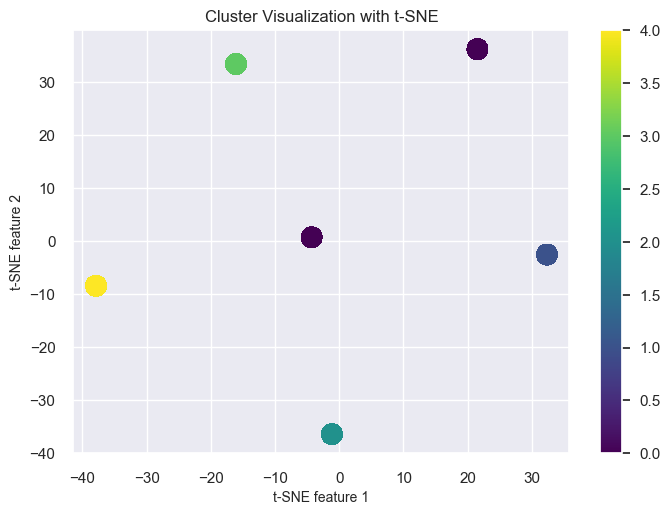

In [135]:
# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_features = tsne.fit_transform(df_combined.select_dtypes(include=[np.number]))

plt.scatter(tsne_features[:,0], tsne_features[:,1], c=df4['cluster_label'], cmap='viridis', s=200)
plt.title('Cluster Visualization with t-SNE')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar()
plt.show()

### Elbow method for K-Prototypes

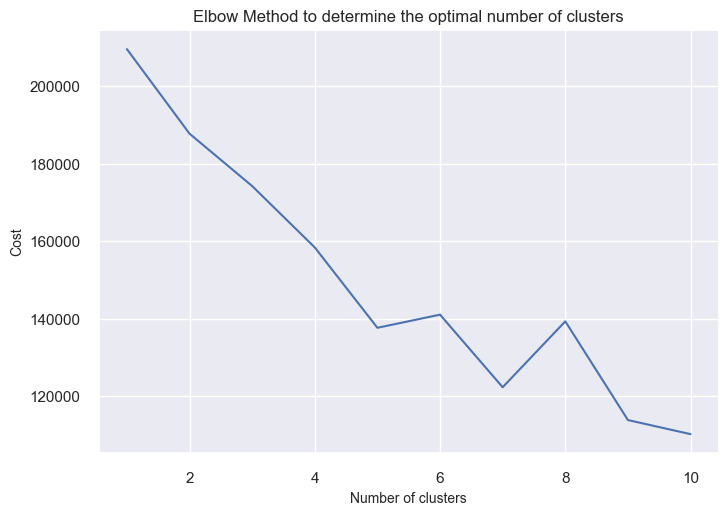

In [136]:
costs = []
K = range(1, 11)
for num_clusters in K:
    kproto = KPrototypes(n_clusters=num_clusters, init='Random', n_init=1, verbose=0)
    kproto.fit_predict(df_combined, categorical=categorical_indices)
    costs.append(kproto.cost_)

plt.plot(K, costs, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method to determine the optimal number of clusters')
plt.show()

### Cluster Stability Test

In [137]:
# Suppose you have two lists of cluster labels from two separate runs
labels1 = kproto.fit_predict(df_combined, categorical=categorical_indices)
labels2 = kproto.fit_predict(df_combined, categorical=categorical_indices)

# Calculate the Adjusted Rand Score
rand_score = adjusted_rand_score(labels1, labels2)
print(f"Adjusted Rand Score: {rand_score}")

Adjusted Rand Score: 0.6634924059545193


- By the elbow method and t-SNE for K-Prototypes (clustering by perspectives), we can identify 5 clusters.